In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [3]:
# Importing Configs
# Define the path where config.py is located
# Mac
os.chdir("/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling")
# Linux
# os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

# Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models

Body = config.Body
Model = config.Model
Model_Subfolder = f"/{Body} Texts/{Model}"
# Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f"/{Body_2} Texts/{Model_2}"
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [4]:
df_sent = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model_line.csv")
df_sent_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model_line.csv")

df_tone = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model.csv")
df_tone_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model.csv")

df_tone = df_tone[["date", "title", "tone"]]
df_tone_2 = df_tone_2[["date", "title", "tone"]]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kylenabors/Documents/Database/Models/FinBERT Models/ECB_Economic Bulletin_finbert model_line.csv'

In [ ]:
df_var = df_sent[["date", "sentiment"]].copy(deep=True)
df_var_2 = df_sent_2[["date", "sentiment"]].copy(deep=True)

In [ ]:
df_var = df_var.groupby(["date"]).agg(["mean", "median", "var"]).reset_index()
df_var.columns = ["_".join(col).strip() for col in df_var.columns.values]
df_var = df_var.rename(columns={"date_": "date"})

In [ ]:
df_var_2 = df_var_2.groupby(["date"]).agg(["mean", "median", "var"]).reset_index()
df_var_2.columns = ["_".join(col).strip() for col in df_var_2.columns.values]
df_var_2 = df_var_2.rename(columns={"date_": "date"})

In [ ]:
df_tone["tone"] = df_tone["tone"].replace({"positive": 1, "neutral": 0, "negative": -1})
df_tone_2["tone"] = df_tone_2["tone"].replace(
    {"positive": 1, "neutral": 0, "negative": -1}
)

df = df_tone.merge(df_var, on="date", how="inner")
df_2 = df_tone_2.merge(df_var_2, on="date", how="inner")

In [ ]:
df_sent = df_sent[["date", "sentiment"]]

df_sent["dup_number"] = df_sent.groupby(["date"]).cumcount() + 1


print(df_sent.head())
# pivot = df_sent.pivot(index='title', columns='dup_number', values ='sentiment')
# pivot = pd.pivot_table(df_sent, index='title', columns='dup_number', values ='sentiment', fill_value=0)
pivot = pd.pivot_table(
    df_sent, index="dup_number", columns="date", values="sentiment", fill_value=None
)

         date  sentiment  dup_number
0  1998-07-01          0           1
1  1998-07-01          0           2
2  1998-07-01          0           3
3  1998-07-01          0           4
4  1998-07-01         -1           5


In [ ]:
df_sent["neg"] = df_sent["sentiment"].apply(lambda x: 1 if x < 0 else 0)
df_sent["pos"] = df_sent["sentiment"].apply(lambda x: 1 if x > 0 else 0)
df_sent["neu"] = df_sent["sentiment"].apply(lambda x: 1 if x == 0 else 0)

df_sent_2["neg"] = df_sent_2["sentiment"].apply(lambda x: 1 if x < 0 else 0)
df_sent_2["pos"] = df_sent_2["sentiment"].apply(lambda x: 1 if x > 0 else 0)
df_sent_2["neu"] = df_sent_2["sentiment"].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
dates = df_sent["date"].unique().tolist()

num_sent = []
for date in dates:
    num_neg = df_sent[df_sent["date"] == date]["neg"].sum()
    num_pos = df_sent[df_sent["date"] == date]["pos"].sum()
    num_neu = df_sent[df_sent["date"] == date]["neu"].sum()
    num_sent.append([date, num_neg, num_neu, num_pos])

df_num_sent = pd.DataFrame(num_sent, columns=["date", "neg", "neu", "pos"])

df_num_sent["date"] = df_num_sent["date"].str[0:7]

df_num_sent = df_num_sent.groupby(["date"]).mean().reset_index()


dates_2 = df_sent_2["date"].unique().tolist()

num_sent_2 = []
for date in dates_2:
    num_neg_2 = df_sent_2[df_sent_2["date"] == date]["neg"].sum()
    num_pos_2 = df_sent_2[df_sent_2["date"] == date]["pos"].sum()
    num_neu_2 = df_sent_2[df_sent_2["date"] == date]["neu"].sum()
    num_sent_2.append([date, num_neg_2, num_neu_2, num_pos_2])

df_num_sent_2 = pd.DataFrame(num_sent_2, columns=["date", "neg", "neu", "pos"])

df_num_sent_2["date"] = df_num_sent_2["date"].str[0:7]

df_num_sent_2 = df_num_sent_2.groupby(["date"]).mean().reset_index()

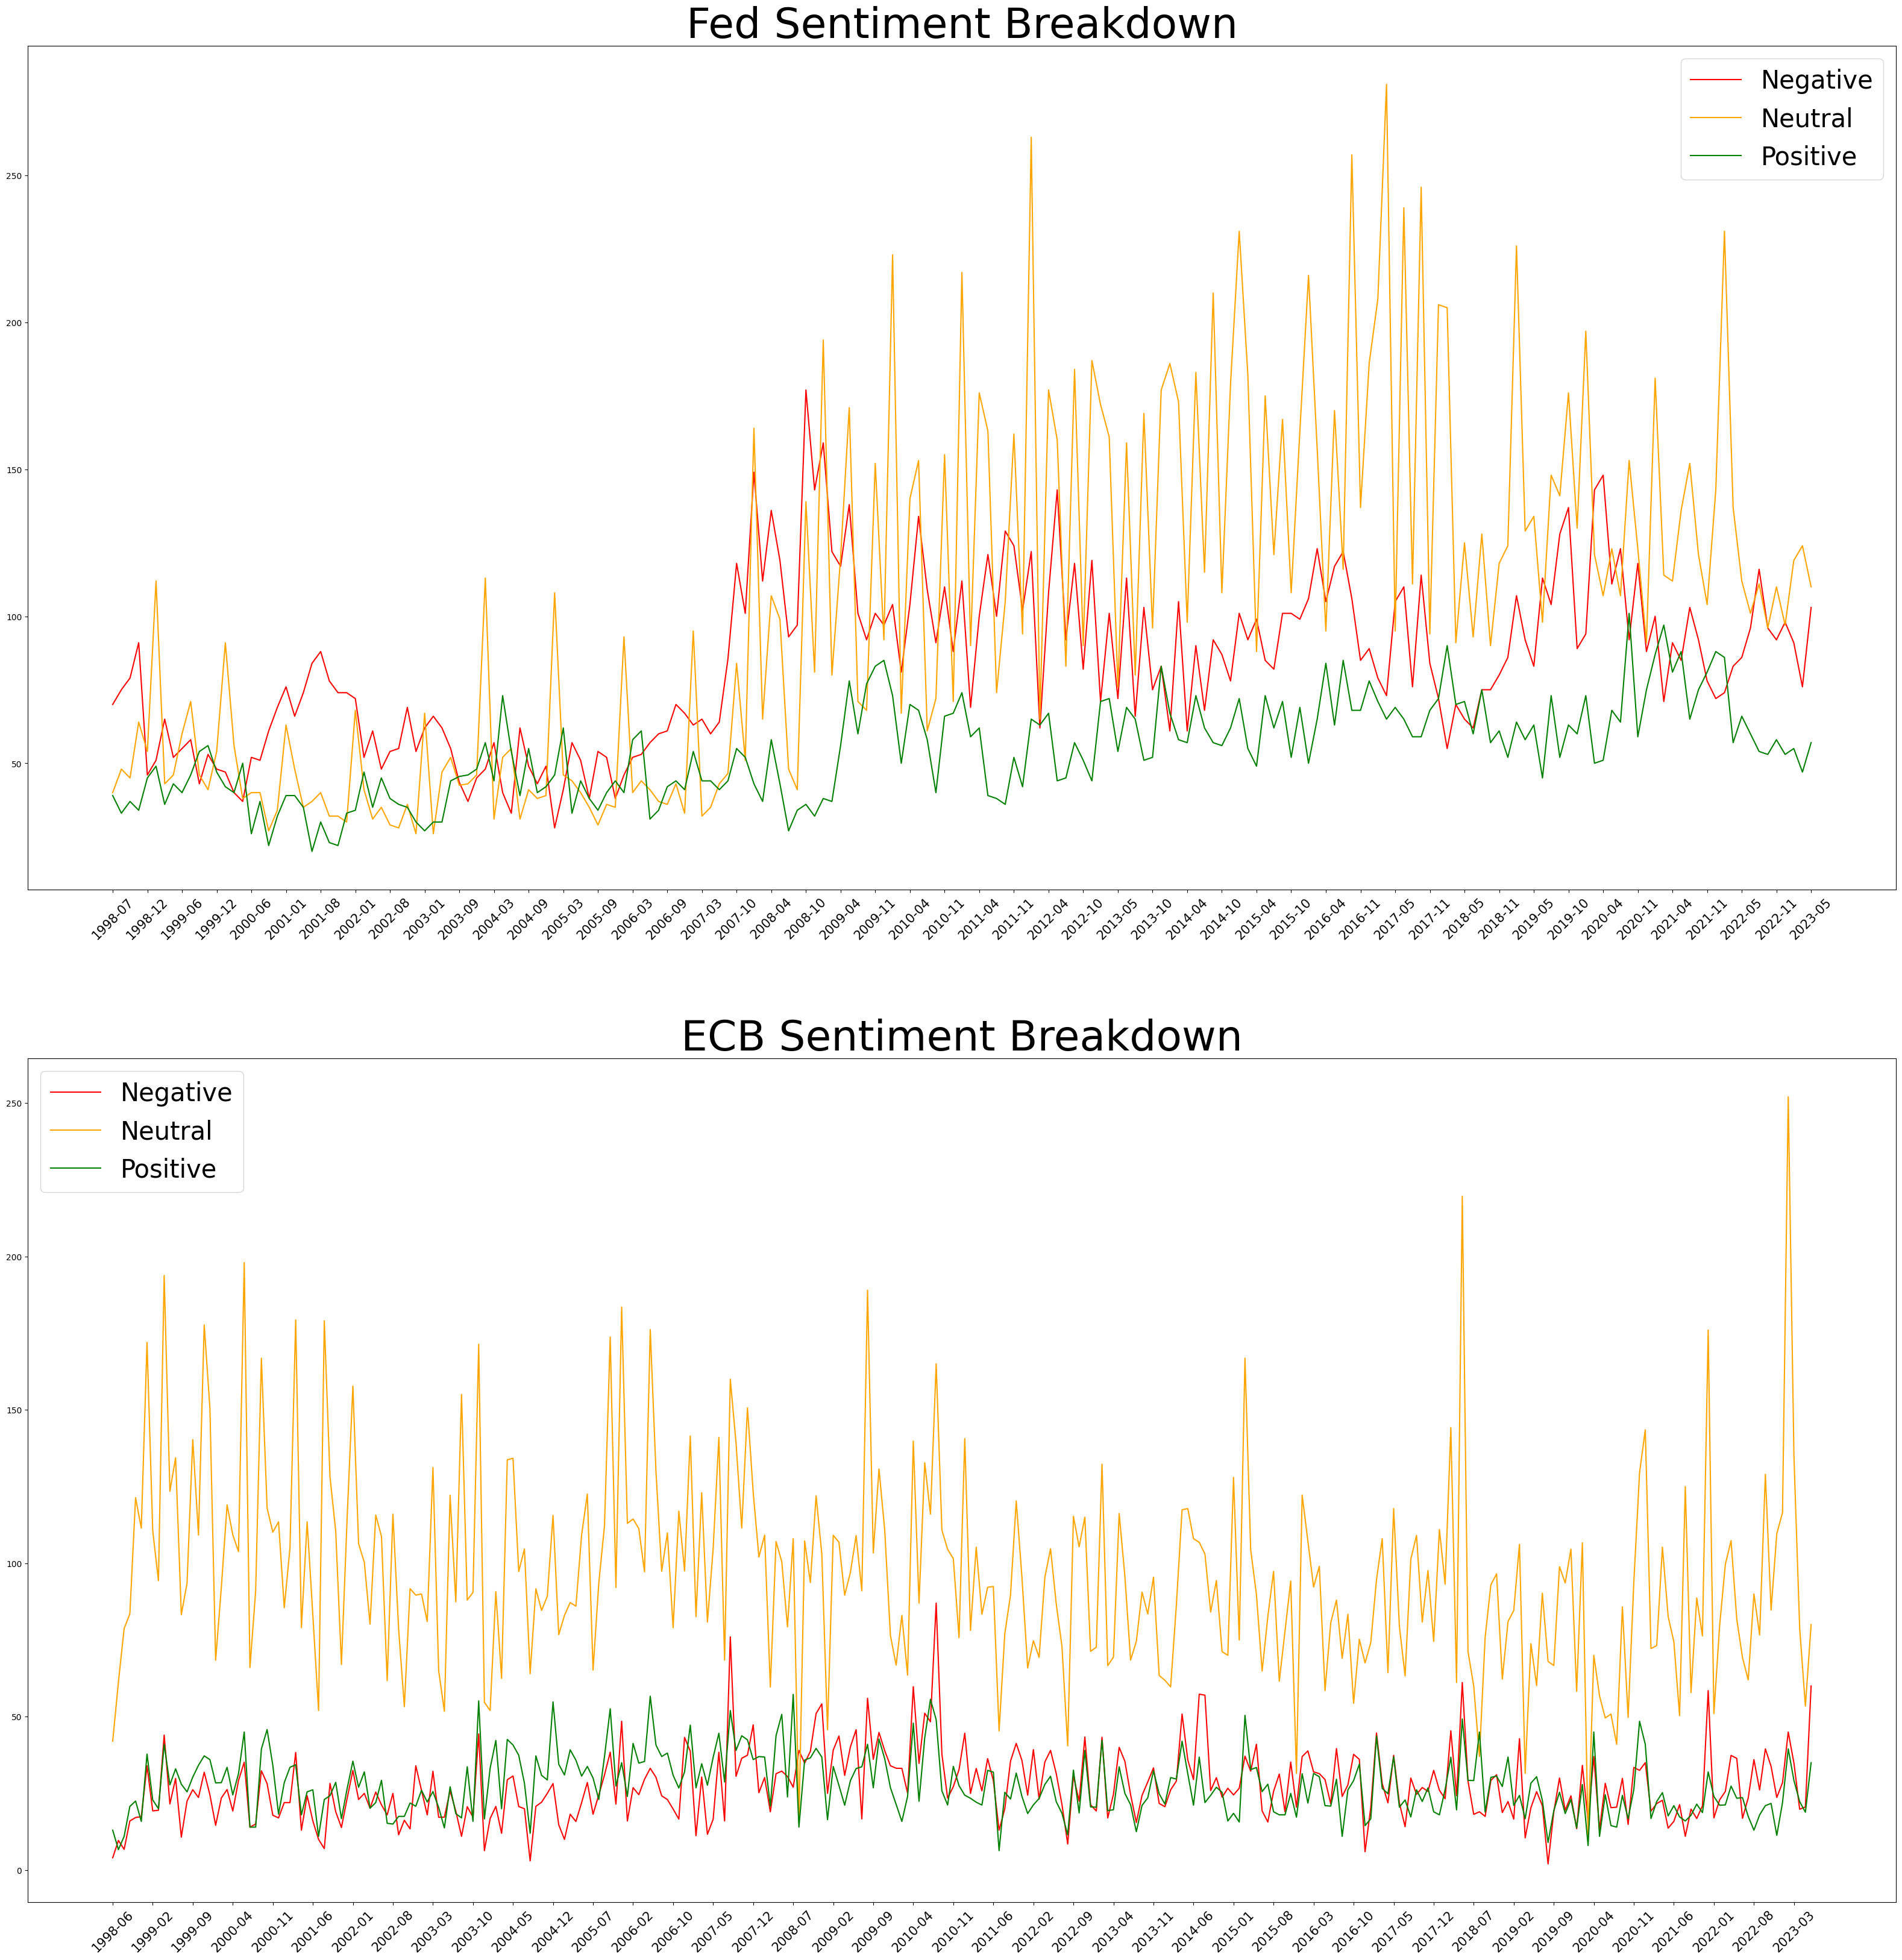

In [ ]:
# num_plot = df_num_sent.plot(x='date', y=['neg', 'neu', 'pos'], kind='bar', stacked=True, figsize=(40,20), legend=True, fontsize=20)


# Create a list of x-axis tick positions
num_ticks = 40  # Adjust this number as needed
x_tick_positions_0 = df_num_sent["date"].iloc[:: len(df_num_sent) // num_ticks].tolist()
x_tick_positions_1 = (
    df_num_sent_2["date"].iloc[:: len(df_num_sent_2) // num_ticks].tolist()
)

fig, axs = plt.subplots(2, 1, figsize=(40, 40))

axs[0].plot(df_num_sent["date"], df_num_sent["neg"], color="red")
axs[0].plot(df_num_sent["date"], df_num_sent["neu"], color="orange")
axs[0].plot(df_num_sent["date"], df_num_sent["pos"], color="green")

axs[1].plot(df_num_sent_2["date"], df_num_sent_2["neg"], color="red")
axs[1].plot(df_num_sent_2["date"], df_num_sent_2["neu"], color="orange")
axs[1].plot(df_num_sent_2["date"], df_num_sent_2["pos"], color="green")

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis="x", rotation=45, labelsize=15)
axs[1].tick_params(axis="x", rotation=45, labelsize=15)


axs[0].set_title(f"{Body} Sentiment Breakdown", fontsize=50)
axs[1].set_title(f"{Body_2} Sentiment Breakdown", fontsize=50)


axs[0].legend(["Negative", "Neutral", "Positive"], fontsize=30)
axs[1].legend(["Negative", "Neutral", "Positive"], fontsize=30)

plt.show()

In [ ]:
titles_1 = pivot.columns.tolist()

print(titles_1)

sub_var = []

for title in titles_1:
    sub_var.append(df_var[df_var["date"] == title]["sentiment_var"].values[0])

df_sub_var = pd.DataFrame({"date": titles_1, "var": sub_var})

var_ts = df_tone.merge(df_sub_var, on="date", how="inner")
print(var_ts.head(-100))
print(len(var_ts))

['1998-07-01', '1998-08-18', '1998-09-29', '1998-11-17', '1998-12-22', '1999-02-03', '1999-03-30', '1999-05-18', '1999-06-30', '1999-08-24', '1999-10-05', '1999-11-16', '1999-12-21', '2000-02-02', '2000-03-21', '2000-05-16', '2000-06-28', '2000-08-22', '2000-10-03', '2000-11-15', '2001-01-03', '2001-01-31', '2001-03-20', '2001-05-15', '2001-06-27', '2001-08-21', '2001-10-02', '2001-11-06', '2001-12-11', '2002-01-30', '2002-03-19', '2002-05-07', '2002-06-26', '2002-08-13', '2002-09-24', '2002-11-06', '2002-12-10', '2003-01-29', '2003-03-25', '2003-05-06', '2003-06-25', '2003-09-15', '2003-09-16', '2003-10-28', '2003-12-09', '2004-01-28', '2004-03-16', '2004-05-04', '2004-06-30', '2004-08-10', '2004-09-21', '2004-11-10', '2004-12-14', '2005-02-02', '2005-03-22', '2005-05-03', '2005-06-30', '2005-08-09', '2005-09-20', '2005-11-01', '2005-12-13', '2006-01-31', '2006-03-28', '2006-05-10', '2006-06-29', '2006-08-08', '2006-09-20', '2006-10-25', '2006-12-12', '2007-01-31', '2007-03-21', '2007

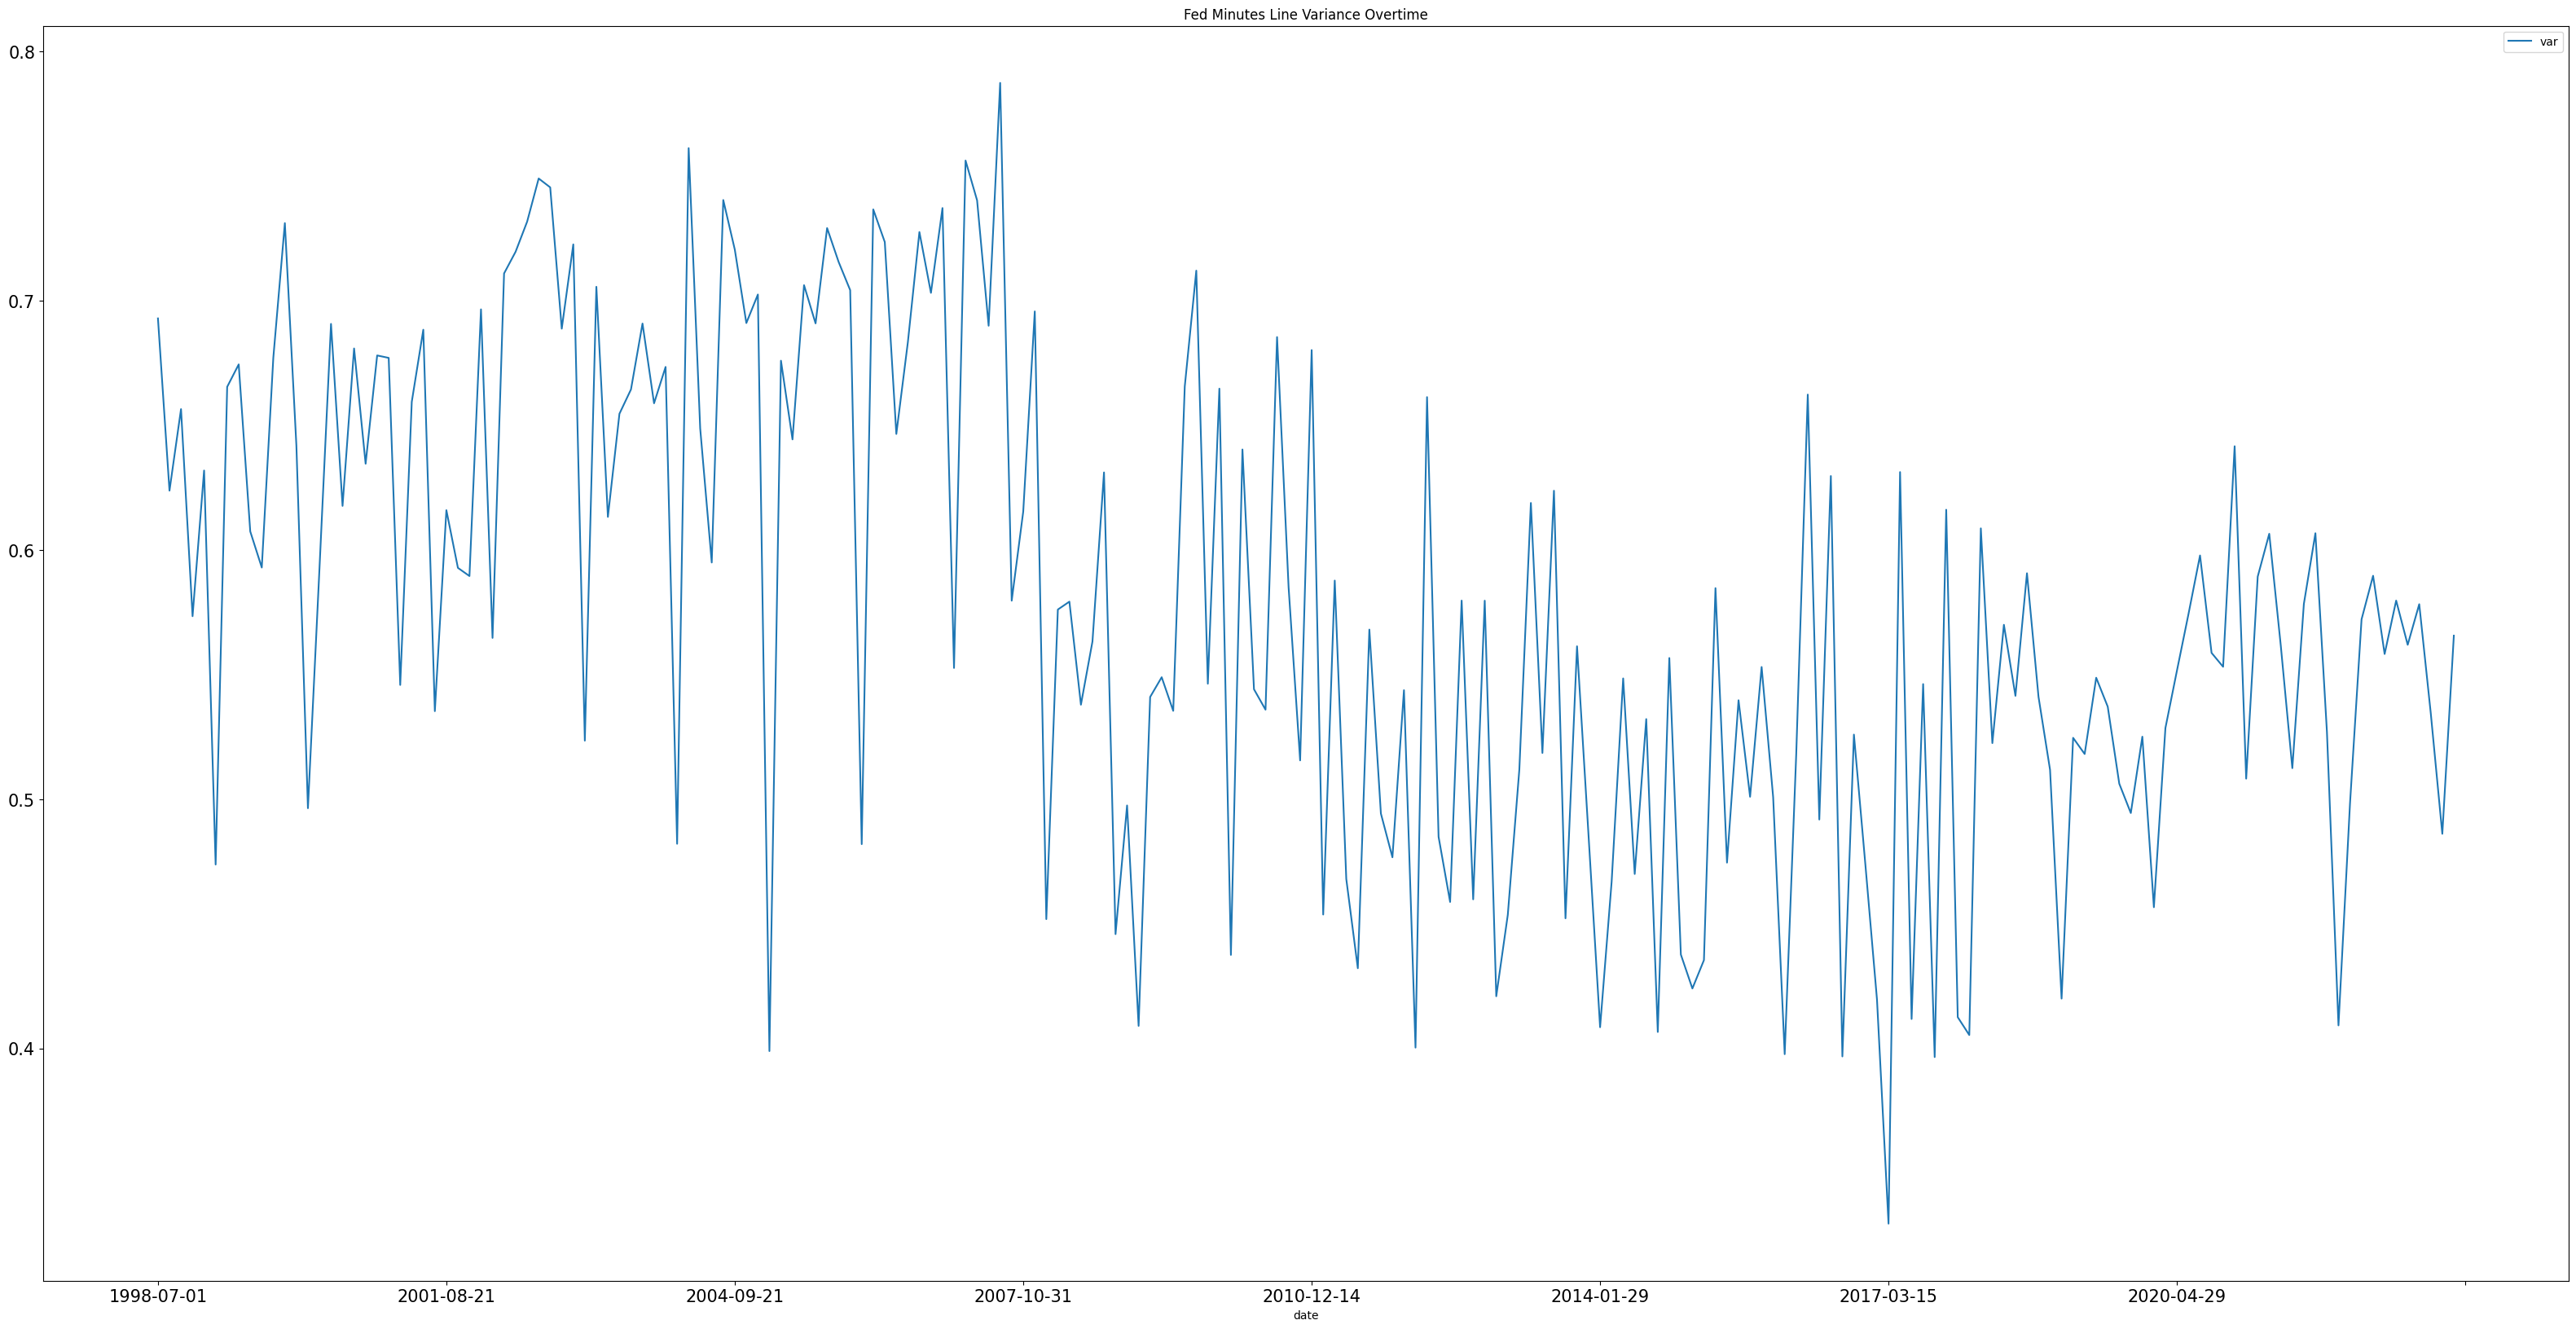

In [ ]:
plot = var_ts.plot(
    x="date",
    y="var",
    figsize=(40, 20),
    title=f"{Body} {Model} Line Variance Overtime",
    fontsize=15,
)

In [ ]:
pivot["mean"] = pivot.mean(axis=1)
pivot["var"] = pivot.var(axis=1)

window = 1500

pivot["rmean"] = pivot["mean"].rolling(window).mean()
pivot["rvar"] = pivot["mean"].rolling(window).var()
pivot["ci"] = 1.96 * np.sqrt(pivot["rvar"] / len(pivot["rvar"]))

Text(0.5, 1.0, 'Fed Variance of Tone By Line Number: 1500 line window')

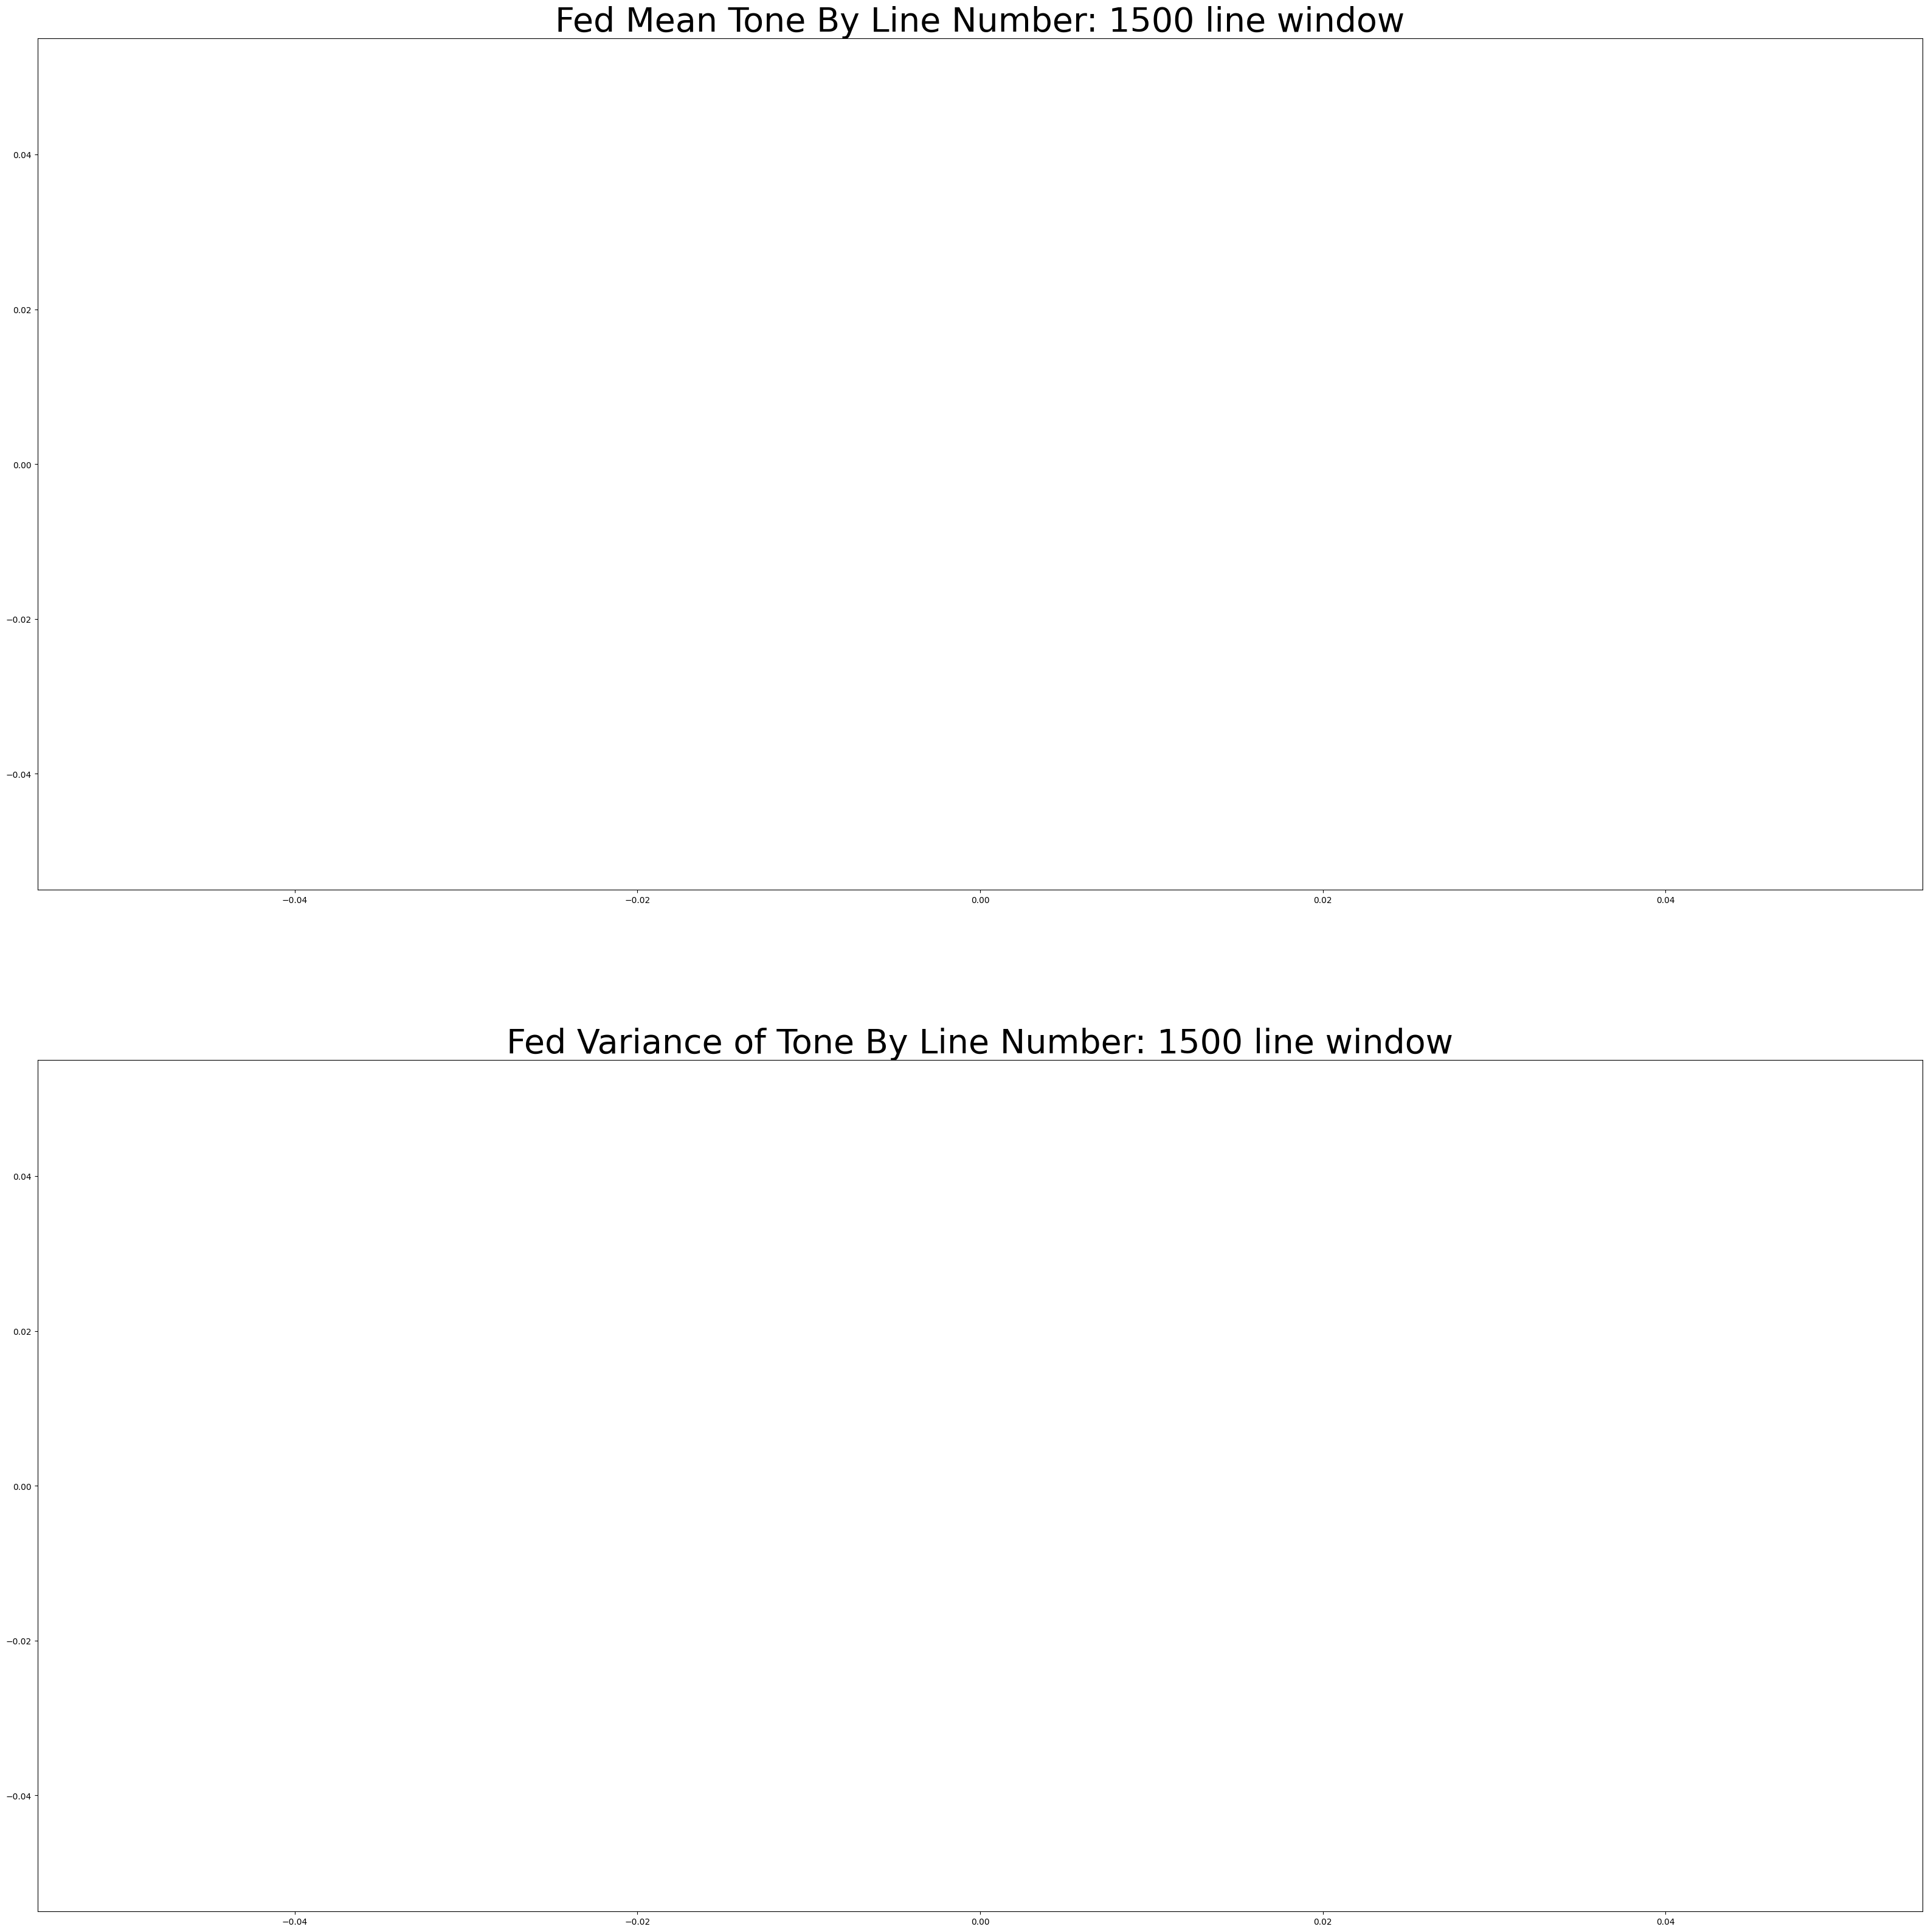

In [ ]:
# Create a list of x-axis tick positions
# num_ticks = 200  # Adjust this number as needed
# x_tick_positions_0 = pivot['date'].iloc[::len(df) // num_ticks].tolist()
# x_tick_positions_1 = pivot['date'].iloc[::len(df) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 40))
axs[0].plot(pivot["rmean"], color="blue", label="mean")
axs[0].fill_between(
    pivot.index,
    pivot["rmean"] - pivot["ci"],
    pivot["rmean"] + pivot["ci"],
    color="b",
    alpha=0.1,
)

axs[1].plot(pivot["rvar"], color="red", label="var")

axs[0].set_title(f"{Body} Mean Tone By Line Number: {window} line window", fontsize=40)
axs[1].set_title(
    f"{Body} Variance of Tone By Line Number: {window} line window", fontsize=40
)

# plt.show()

In [ ]:
df_sent_2 = df_sent_2[["date", "sentiment"]]
df_sent_2["dup_number"] = df_sent_2.groupby(["date"]).cumcount() + 1


print(df_sent_2.head())
# pivot = df_sent.pivot(index='title', columns='dup_number', values ='sentiment')
# pivot_2 = pd.pivot_table(df_sent_2, index='title', columns='dup_number', values ='sentiment', fill_value=0)
pivot_2 = pd.pivot_table(
    df_sent_2, index="dup_number", columns="date", values="sentiment", fill_value=None
)

         date  sentiment  dup_number
0  2023-06-01          0           1
1  2023-06-01          0           2
2  2023-06-01          0           3
3  2023-06-01          1           4
4  2023-06-01          1           5


In [ ]:
titles_2 = pivot_2.columns.tolist()

print(titles_1)

sub_var_2 = []

for title in titles_2:
    sub_var_2.append(df_var_2[df_var_2["date"] == title]["sentiment_var"].values[0])

df_sub_var_2 = pd.DataFrame({"date": titles_2, "var": sub_var_2})


var_ts_2 = df_tone_2.merge(df_sub_var_2, on="date", how="inner")
print(var_ts_2.head(-100))
print(len(var_ts_2))

['1998-07-01', '1998-08-18', '1998-09-29', '1998-11-17', '1998-12-22', '1999-02-03', '1999-03-30', '1999-05-18', '1999-06-30', '1999-08-24', '1999-10-05', '1999-11-16', '1999-12-21', '2000-02-02', '2000-03-21', '2000-05-16', '2000-06-28', '2000-08-22', '2000-10-03', '2000-11-15', '2001-01-03', '2001-01-31', '2001-03-20', '2001-05-15', '2001-06-27', '2001-08-21', '2001-10-02', '2001-11-06', '2001-12-11', '2002-01-30', '2002-03-19', '2002-05-07', '2002-06-26', '2002-08-13', '2002-09-24', '2002-11-06', '2002-12-10', '2003-01-29', '2003-03-25', '2003-05-06', '2003-06-25', '2003-09-15', '2003-09-16', '2003-10-28', '2003-12-09', '2004-01-28', '2004-03-16', '2004-05-04', '2004-06-30', '2004-08-10', '2004-09-21', '2004-11-10', '2004-12-14', '2005-02-02', '2005-03-22', '2005-05-03', '2005-06-30', '2005-08-09', '2005-09-20', '2005-11-01', '2005-12-13', '2006-01-31', '2006-03-28', '2006-05-10', '2006-06-29', '2006-08-08', '2006-09-20', '2006-10-25', '2006-12-12', '2007-01-31', '2007-03-21', '2007

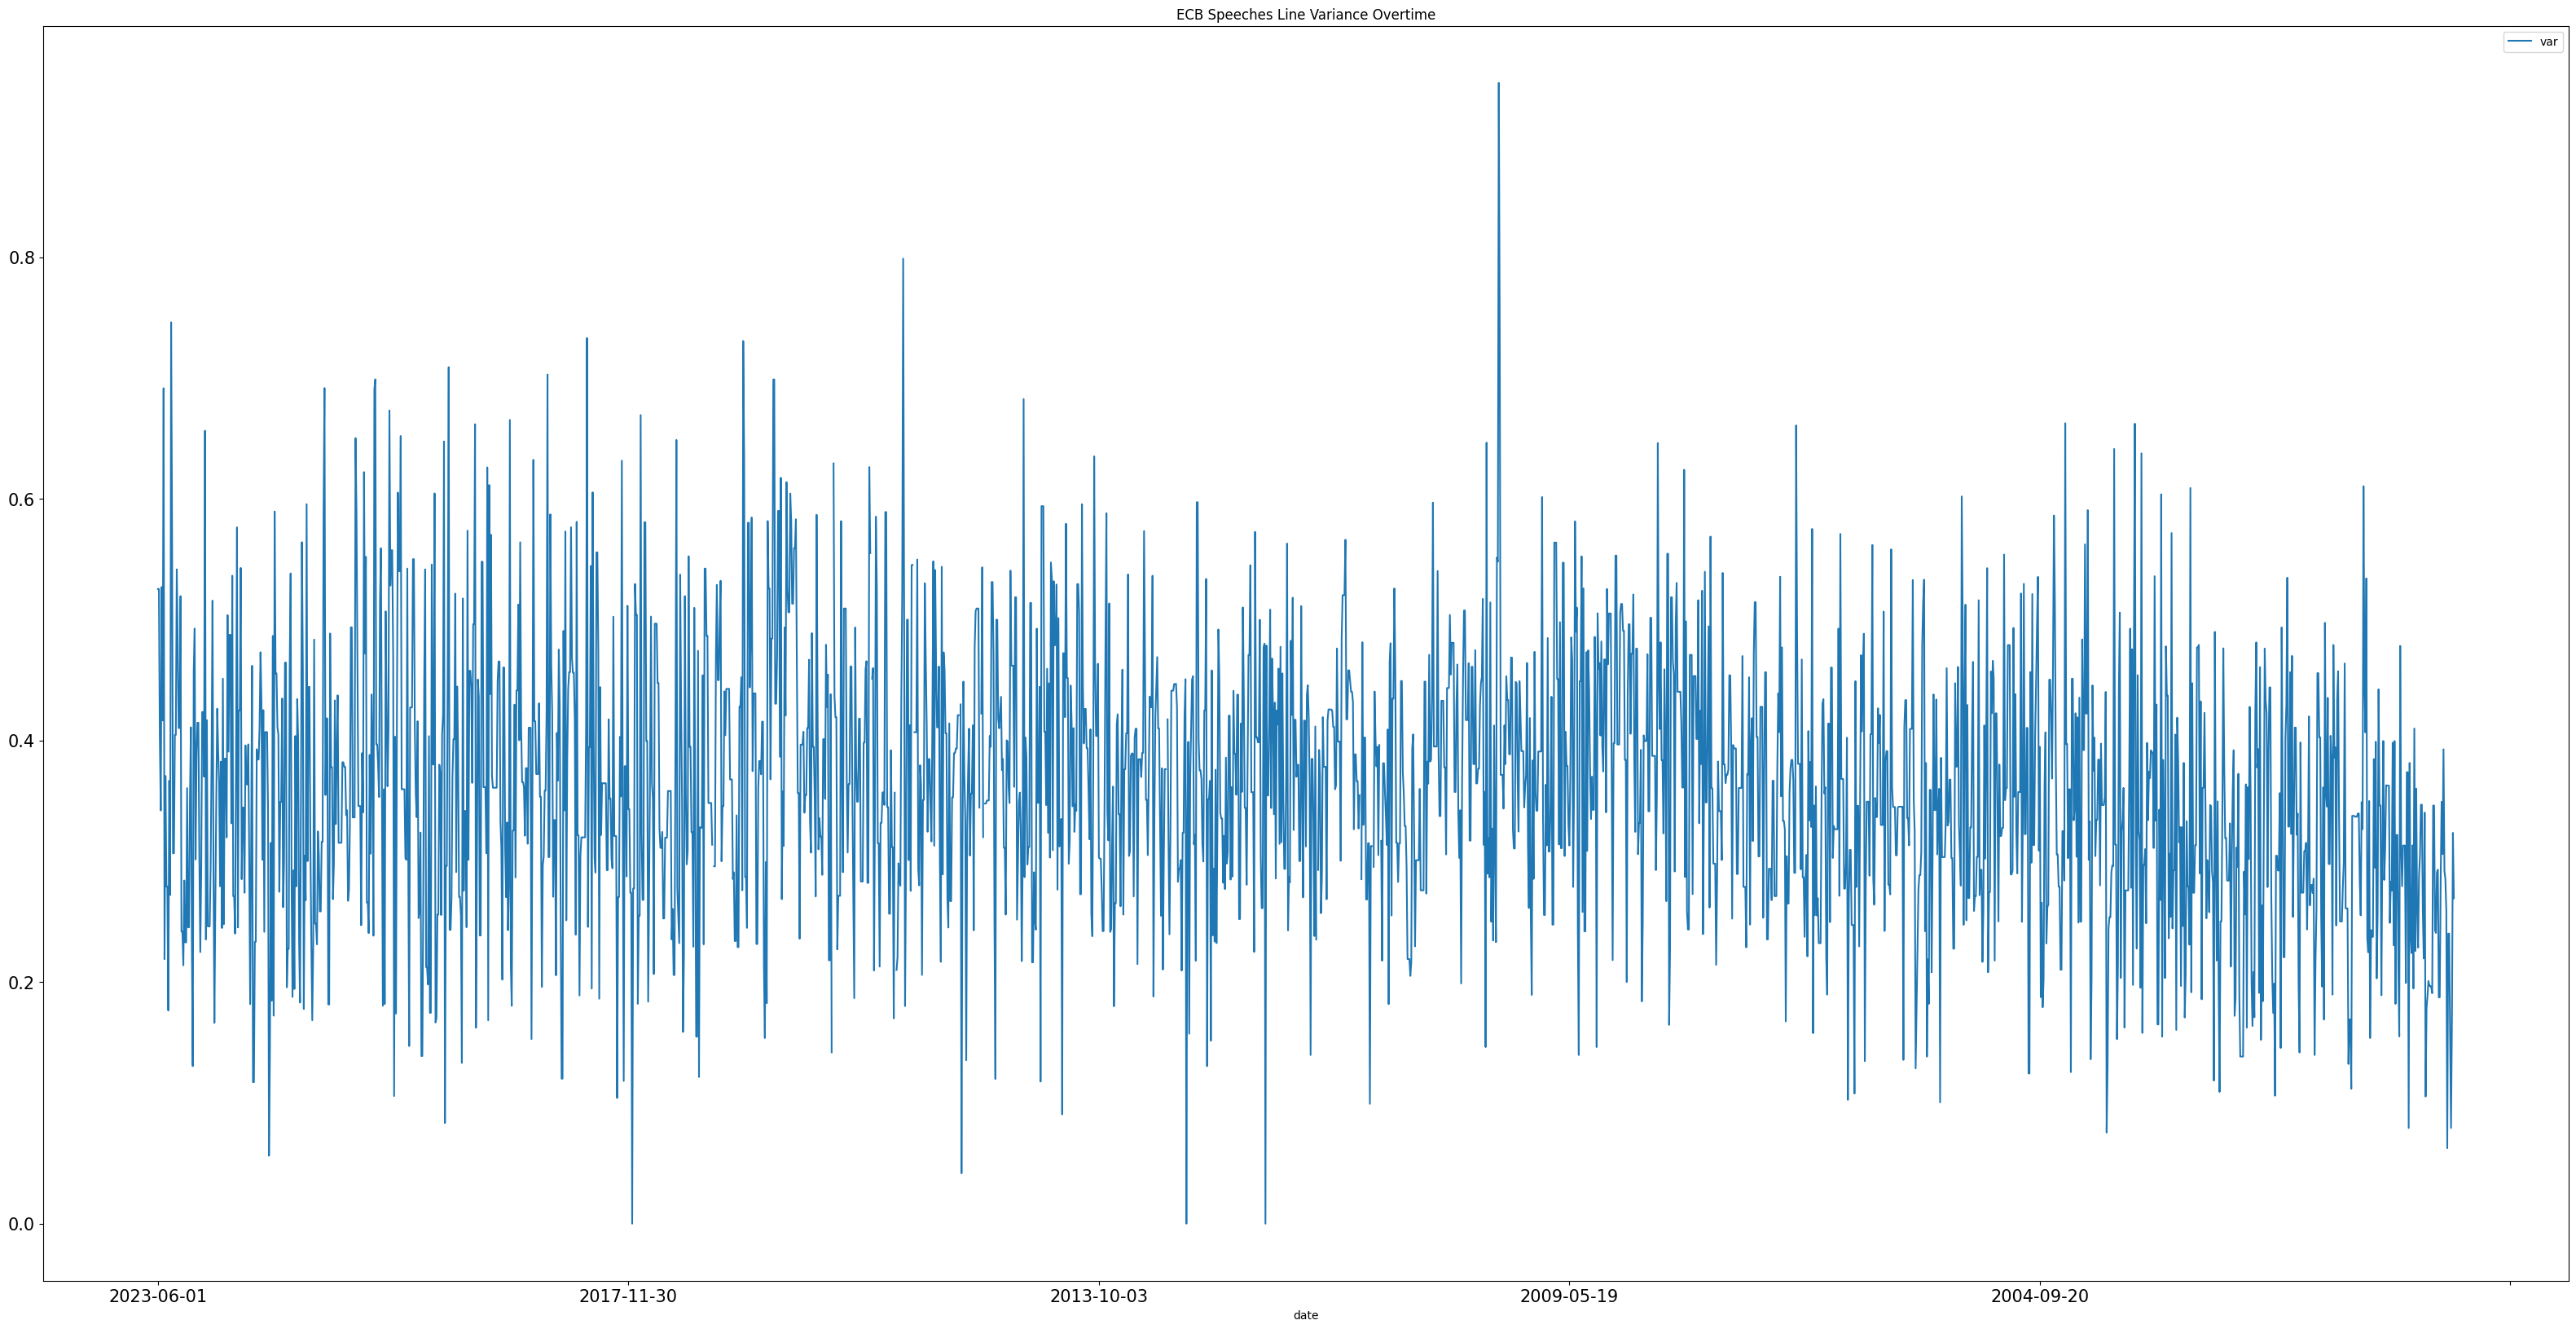

In [ ]:
plot_2 = var_ts_2.plot(
    x="date",
    y="var",
    figsize=(40, 20),
    title=f"{Body_2} {Model_2} Line Variance Overtime",
    fontsize=15,
)

In [ ]:
pivot_2["mean"] = pivot_2.mean(axis=1)
pivot_2["var"] = pivot_2.var(axis=1)

window = 250

pivot_2["rmean"] = pivot_2["mean"].rolling(window).mean()
pivot_2["rvar"] = pivot_2["mean"].rolling(window).var()
pivot_2["ci"] = 1.96 * np.sqrt(pivot_2["rvar"] / len(pivot_2["rvar"]))

# print(df_group.groupby('period')[['tone', 'rvar']].describe())

Text(0.5, 1.0, 'ECB Variance of Tone By Line Number')

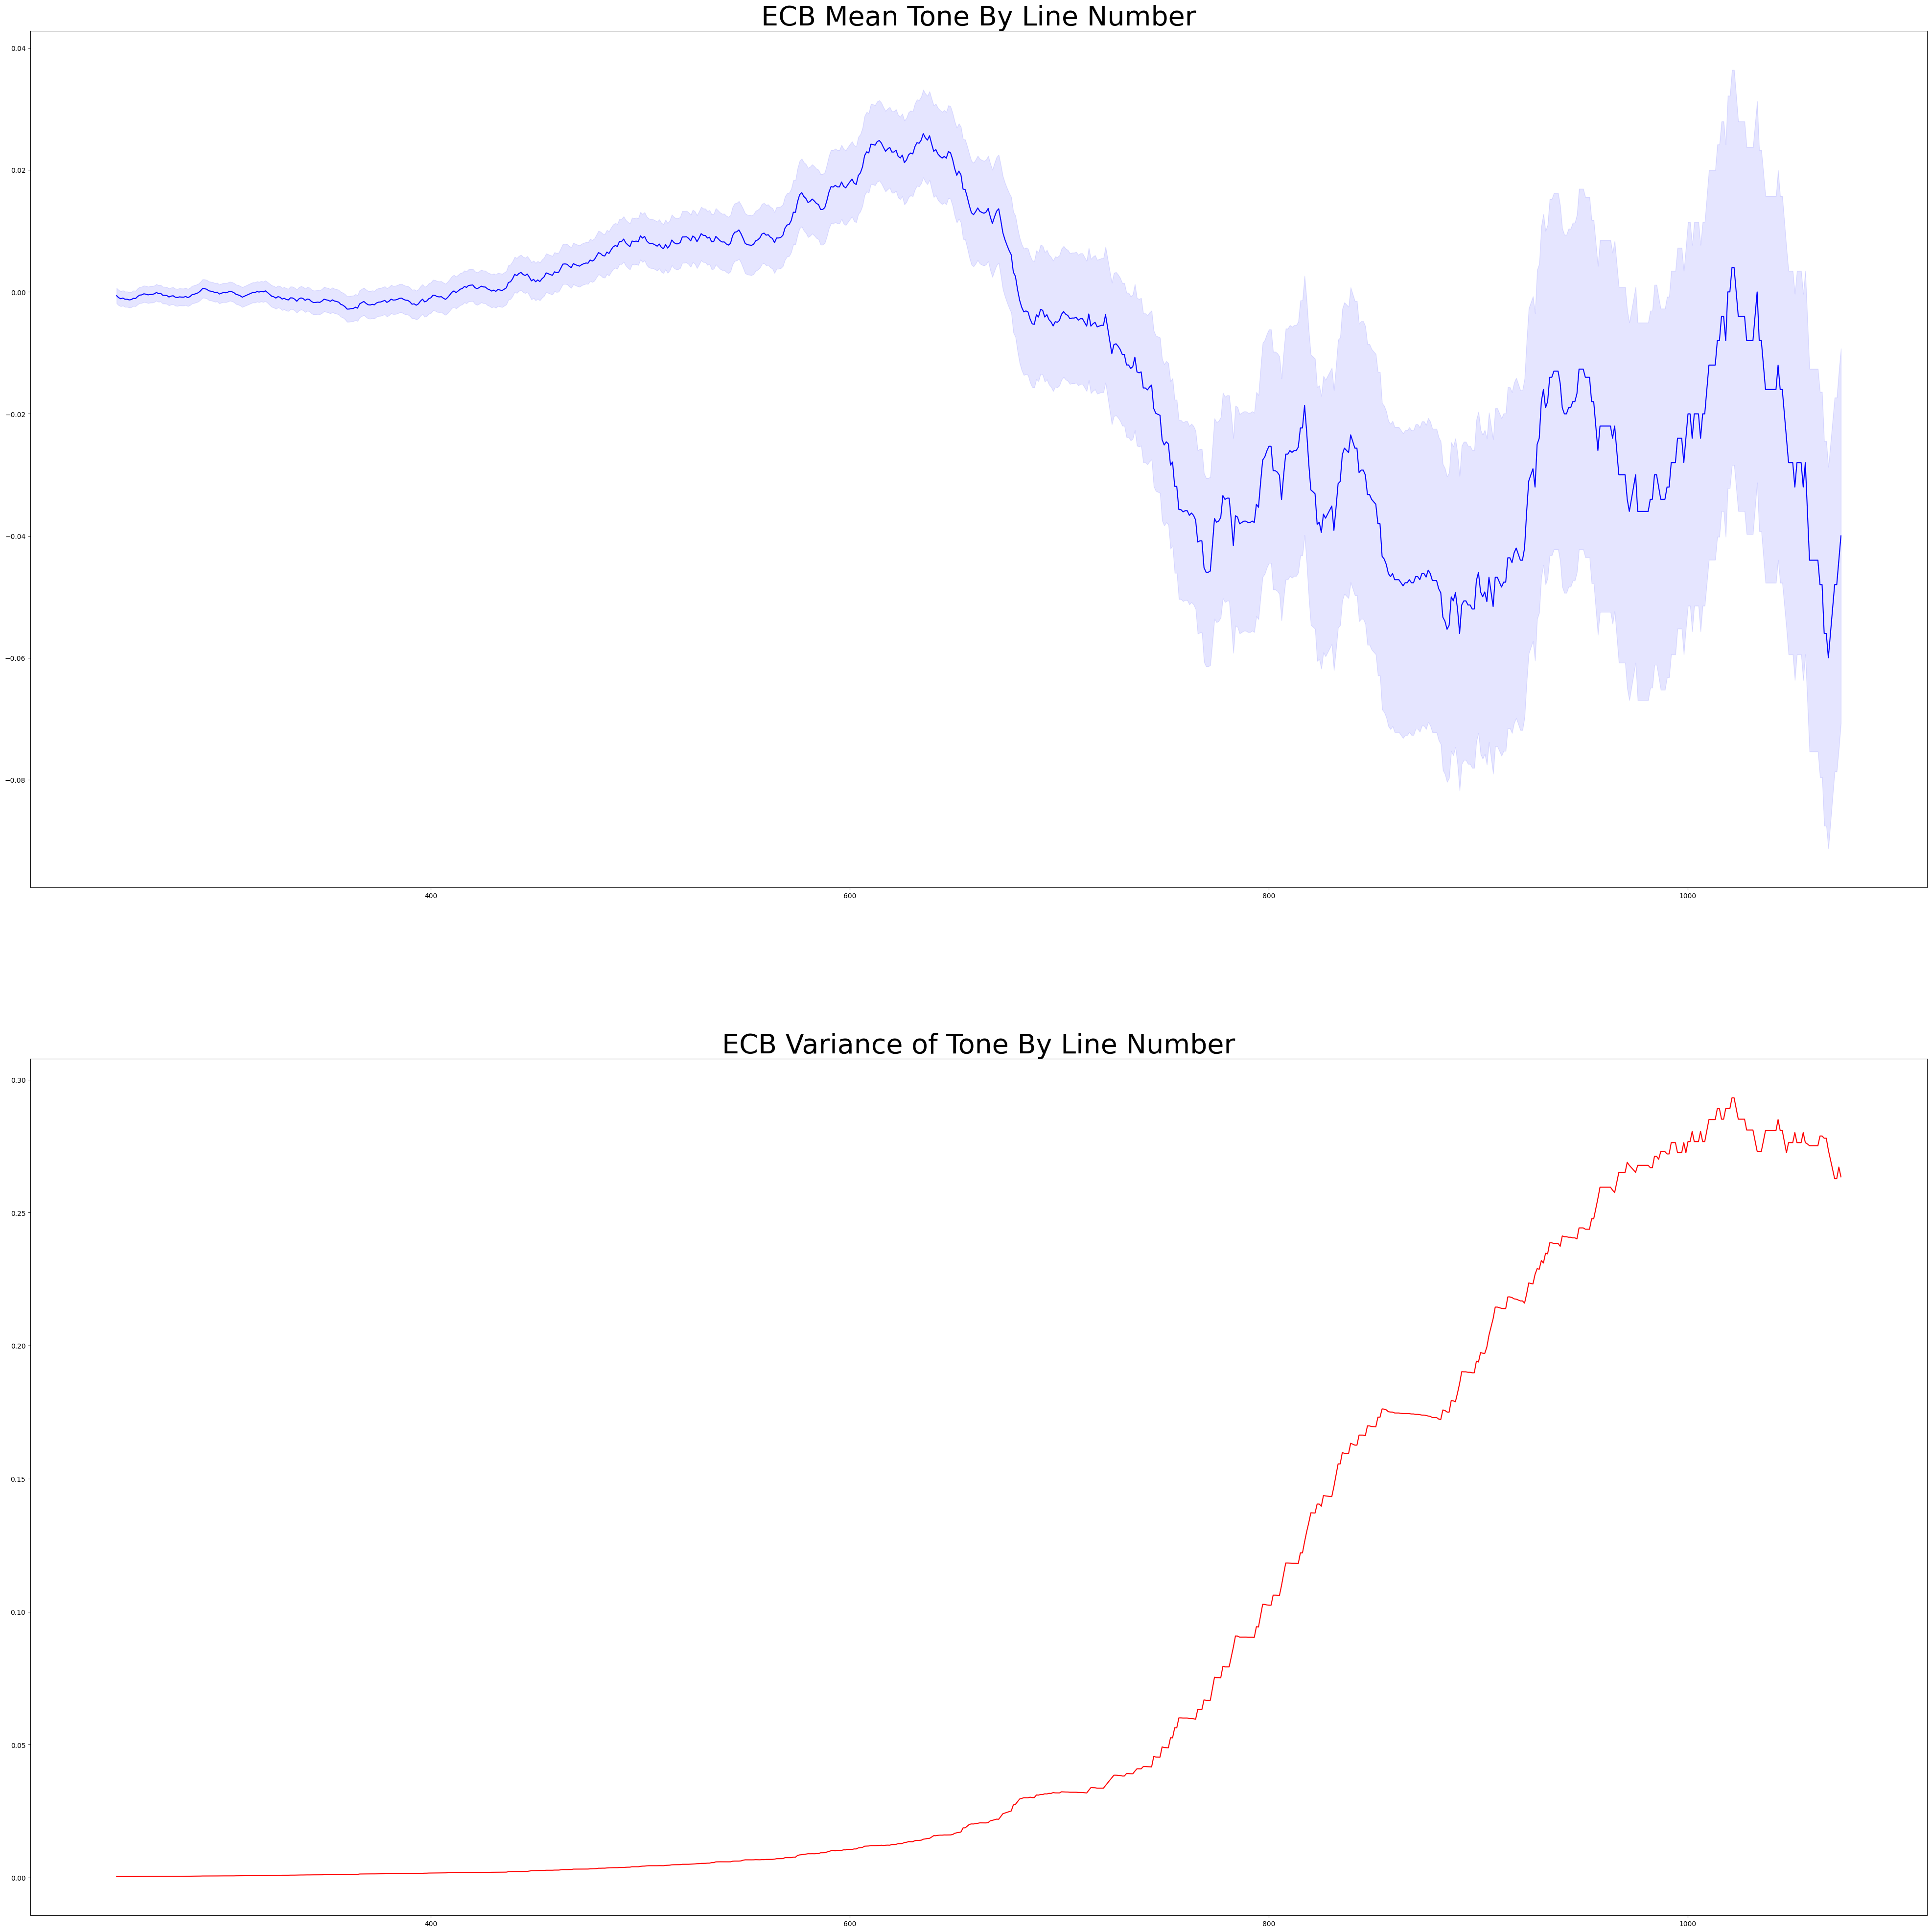

In [ ]:
# pivot_2['mean'] = pivot_2.mean(axis=1)
# pivot_2['var'] = pivot_2.var(axis=1)


# Create a list of x-axis tick positions
# num_ticks = 200  # Adjust this number as needed
# x_tick_positions_0 = pivot['date'].iloc[::len(df) // num_ticks].tolist()
# x_tick_positions_1 = pivot['date'].iloc[::len(df) // num_ticks].tolist()

pivot_2["ci"] = 1.96 * np.sqrt(pivot_2["rvar"] / len(pivot_2["rvar"]))

fig, axs = plt.subplots(2, 1, figsize=(50, 50))
axs[0].plot(pivot_2["rmean"], color="blue", label="mean")
axs[0].fill_between(
    pivot_2.index,
    pivot_2["rmean"] - pivot_2["ci"],
    pivot_2["rmean"] + pivot_2["ci"],
    color="b",
    alpha=0.1,
)


axs[1].plot(pivot_2["rvar"], color="red", label="rvar")

axs[0].set_title(f"{Body_2} Mean Tone By Line Number", fontsize=40)
axs[1].set_title(f"{Body_2} Variance of Tone By Line Number", fontsize=40)

# plt.show()

In [ ]:
df_group = df.copy(deep=True)
meta_temp = df.copy(deep=True)

df_group_2 = df_2.copy(deep=True)
meta_temp_2 = df_2.copy(deep=True)

In [ ]:
tdate = df_group["date"].tolist()

dout = []
for date in tdate:

    if "1998-06-1" <= date < "2000-06-01":
        dout.append([date, 1])

    if "2000-06-1" <= date < "2002-06-01":
        dout.append([date, 2])

    if "2002-06-1" <= date < "2004-06-01":
        dout.append([date, 3])

    if "2004-06-1" <= date < "2006-06-01":
        dout.append([date, 4])

    if "2006-06-1" <= date < "2008-06-01":
        dout.append([date, 5])

    if "2008-06-1" <= date < "2010-06-01":
        dout.append([date, 6])

    if "2010-06-1" <= date < "2012-06-01":
        dout.append([date, 7])

    if "2012-06-1" <= date < "2014-06-01":
        dout.append([date, 8])

    if "2014-06-1" <= date < "2016-06-01":
        dout.append([date, 9])

    if "2016-06-1" <= date < "2018-06-01":
        dout.append([date, 10])

    if "2018-06-1" <= date < "2020-06-01":
        dout.append([date, 11])

    if "2020-06-1" <= date < "2022-06-01":
        dout.append([date, 12])

    if "2022-06-1" <= date < "2024-06-01":
        dout.append([date, 13])

print(dout)
df_dates = pd.DataFrame(dout, columns=["date", "period"])
df_group = df_group.merge(df_dates, on="date", how="inner")
df_group = df_group.drop_duplicates()

df_group = df_group.sort_values(by=["period", "date"], ascending=True)
print(df_group.head())

[['1998-07-01', 1], ['1998-08-18', 1], ['1998-09-29', 1], ['1998-11-17', 1], ['1998-12-22', 1], ['1999-02-03', 1], ['1999-03-30', 1], ['1999-05-18', 1], ['1999-06-30', 1], ['1999-08-24', 1], ['1999-10-05', 1], ['1999-11-16', 1], ['1999-12-21', 1], ['2000-02-02', 1], ['2000-03-21', 1], ['2000-05-16', 1], ['2000-06-28', 2], ['2000-08-22', 2], ['2000-10-03', 2], ['2000-11-15', 2], ['2001-01-03', 2], ['2001-01-31', 2], ['2001-03-20', 2], ['2001-05-15', 2], ['2001-06-27', 2], ['2001-08-21', 2], ['2001-10-02', 2], ['2001-11-06', 2], ['2001-12-11', 2], ['2002-01-30', 2], ['2002-03-19', 2], ['2002-05-07', 2], ['2002-06-26', 3], ['2002-08-13', 3], ['2002-09-24', 3], ['2002-11-06', 3], ['2002-12-10', 3], ['2003-01-29', 3], ['2003-03-25', 3], ['2003-05-06', 3], ['2003-06-25', 3], ['2003-09-15', 3], ['2003-09-16', 3], ['2003-10-28', 3], ['2003-12-09', 3], ['2004-01-28', 3], ['2004-03-16', 3], ['2004-05-04', 3], ['2004-06-30', 4], ['2004-08-10', 4], ['2004-09-21', 4], ['2004-11-10', 4], ['2004-12-1

In [ ]:
tdate_2 = df_group_2["date"].tolist()

dout_2 = []
for date in tdate_2:

    if "1998-06-01" <= date < "2000-06-01":
        dout_2.append([date, 1])

    if "2000-06-01" <= date < "2002-06-01":
        dout_2.append([date, 2])

    if "2002-06-01" <= date < "2004-06-01":
        dout_2.append([date, 3])

    if "2004-06-01" <= date < "2006-06-01":
        dout_2.append([date, 4])

    if "2006-06-01" <= date < "2008-06-01":
        dout_2.append([date, 5])

    if "2008-06-01" <= date < "2010-06-01":
        dout_2.append([date, 6])

    if "2010-06-01" <= date < "2012-06-01":
        dout_2.append([date, 7])

    if "2012-06-01" <= date < "2014-06-01":
        dout_2.append([date, 8])

    if "2014-06-01" <= date < "2016-06-01":
        dout_2.append([date, 9])

    if "2016-06-01" <= date < "2018-06-01":
        dout_2.append([date, 10])

    if "2018-06-01" <= date < "2020-06-01":
        dout_2.append([date, 11])

    if "2020-06-01" <= date < "2022-06-01":
        dout_2.append([date, 12])

    if "2022-06-01" <= date < "2024-06-01":
        dout_2.append([date, 13])

print(dout_2)
df_dates_2 = pd.DataFrame(dout_2, columns=["date", "period"])
df_group_2 = df_group_2.merge(df_dates_2, on="date", how="inner")
df_group_2 = df_group_2.drop_duplicates()

df_group_2 = df_group_2.sort_values(by=["period", "date"], ascending=True)
print(df_group_2.head())

[['2023-06-01', 13], ['2023-06-01', 13], ['2023-05-25', 13], ['2023-05-24', 13], ['2023-05-23', 13], ['2023-05-19', 13], ['2023-05-17', 13], ['2023-05-16', 13], ['2023-05-05', 13], ['2023-04-24', 13], ['2023-04-24', 13], ['2023-04-21', 13], ['2023-04-19', 13], ['2023-04-17', 13], ['2023-04-14', 13], ['2023-04-01', 13], ['2023-03-27', 13], ['2023-03-27', 13], ['2023-03-22', 13], ['2023-03-22', 13], ['2023-03-20', 13], ['2022-11-28', 13], ['2022-09-26', 13], ['2022-09-26', 13], ['2022-06-20', 13], ['2023-03-08', 13], ['2023-03-08', 13], ['2023-03-06', 13], ['2023-03-02', 13], ['2023-02-16', 13], ['2023-02-16', 13], ['2023-02-15', 13], ['2023-01-23', 13], ['2023-01-23', 13], ['2023-01-10', 13], ['2022-12-08', 13], ['2022-12-07', 13], ['2022-12-01', 13], ['2022-11-24', 13], ['2022-11-18', 13], ['2022-11-16', 13], ['2022-11-15', 13], ['2022-11-14', 13], ['2022-11-14', 13], ['2022-11-11', 13], ['2022-11-09', 13], ['2022-11-07', 13], ['2022-11-04', 13], ['2022-11-04', 13], ['2022-11-03', 13],

In [ ]:
print(df_group.groupby("period")["tone"].describe())

        count  mean  std  min  25%  50%  75%  max
period                                           
1       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
2       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
3       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
4       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
5       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
6       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
7       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
8       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
9       16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
10      16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
11      16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
12      16.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
13       8.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00


In [ ]:
print(df_group_2.groupby("period")["tone"].describe())

        count  mean  std   min  25%  50%  75%  max
period                                            
1      148.00  0.19 0.39  0.00 0.00 0.00 0.00 1.00
2      144.00  0.15 0.37 -1.00 0.00 0.00 0.00 1.00
3      134.00  0.07 0.36 -1.00 0.00 0.00 0.00 1.00
4      172.00  0.15 0.35  0.00 0.00 0.00 0.00 1.00
5      229.00  0.20 0.42 -1.00 0.00 0.00 0.00 1.00
6      239.00  0.08 0.53 -1.00 0.00 0.00 0.00 1.00
7      221.00  0.06 0.40 -1.00 0.00 0.00 0.00 1.00
8      235.00  0.03 0.44 -1.00 0.00 0.00 0.00 1.00
9      202.00 -0.01 0.46 -1.00 0.00 0.00 0.00 1.00
10     271.00  0.13 0.53 -1.00 0.00 0.00 0.00 1.00
11     195.00  0.09 0.57 -1.00 0.00 0.00 0.00 1.00
12     178.00 -0.01 0.48 -1.00 0.00 0.00 0.00 1.00
13      73.00  0.12 0.50 -1.00 0.00 0.00 0.00 1.00


In [ ]:
df_group = df_group[
    ["date", "tone", "sentiment_mean", "sentiment_median", "sentiment_var", "period"]
]
df_group_2 = df_group_2[
    ["date", "tone", "sentiment_mean", "sentiment_median", "sentiment_var", "period"]
]

df_group = df_group.groupby("date", as_index=False, dropna=True).mean()
df_group_2 = df_group_2.groupby("date", as_index=False, dropna=True).mean()

In [ ]:
window = 50

df_group["rmean"] = df_group["tone"].rolling(window).mean()
df_group["rvar"] = df_group["tone"].rolling(window).var()
df_group["ci"] = 1.96 * np.sqrt(df_group["rvar"] / len(df_group["rvar"]))

# print(df_group.groupby('period')[['tone', 'rvar']].describe())

In [ ]:
df_group_2["rmean"] = df_group_2["tone"].rolling(window).mean()
df_group_2["rvar"] = df_group_2["tone"].rolling(window).var()
df_group_2["ci"] = 1.96 * np.sqrt(df_group_2["rvar"] / len(df_group_2["rvar"]))

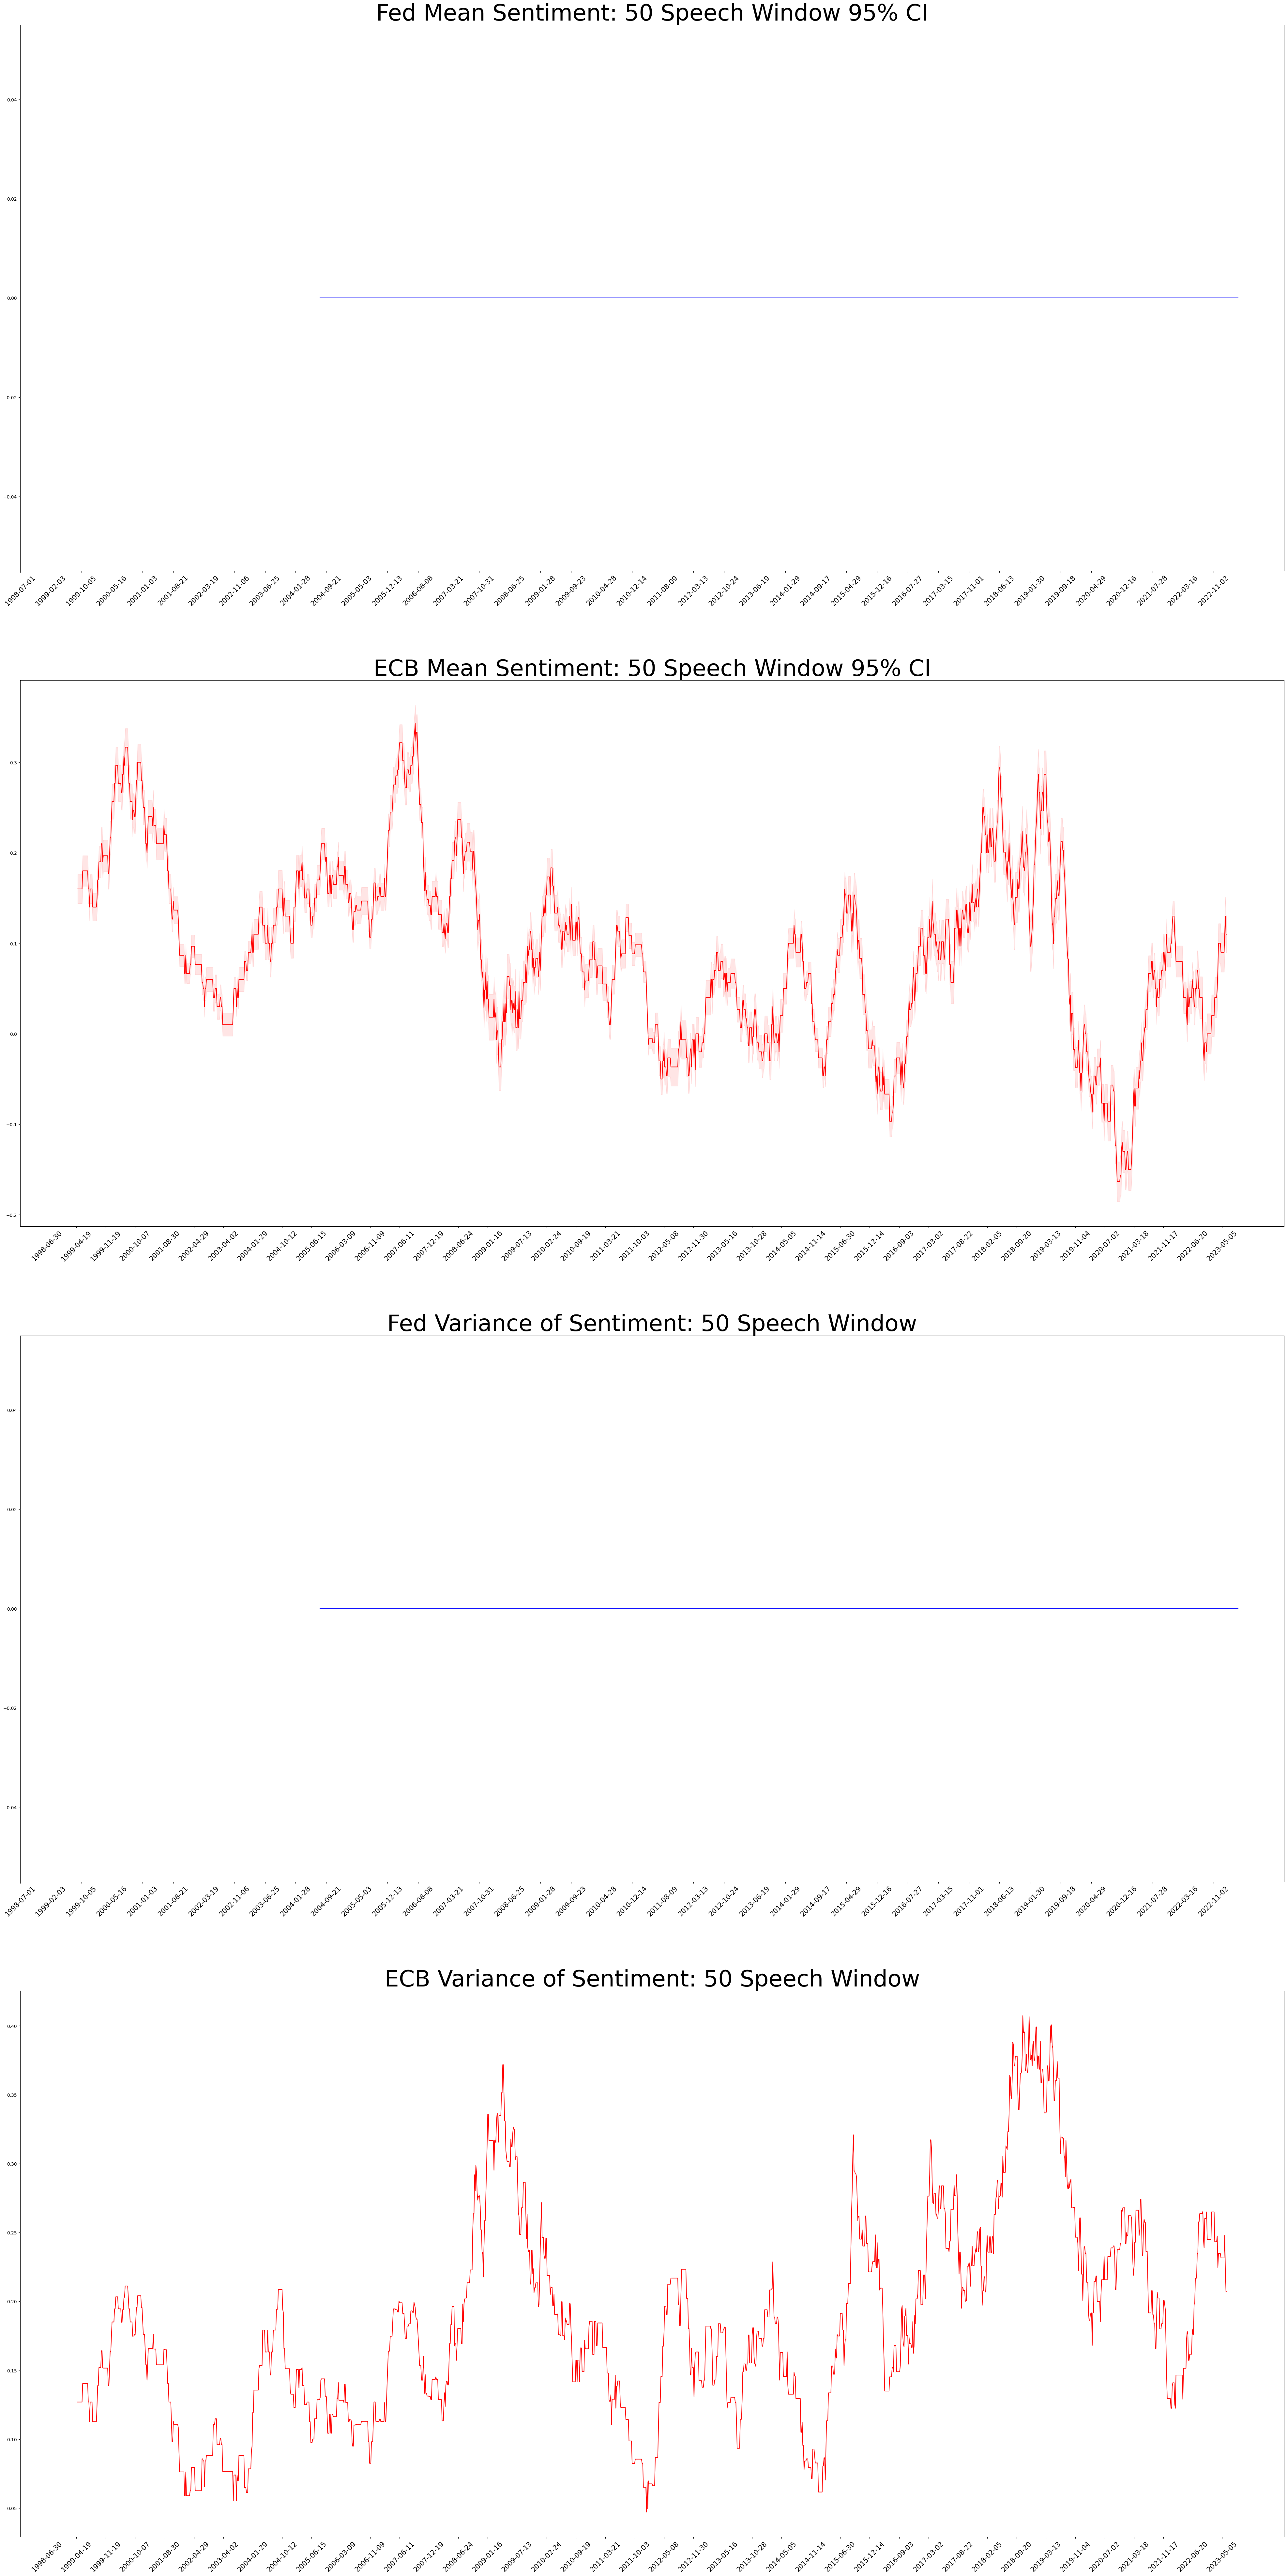

In [ ]:
# Create a list of x-axis tick positions
num_ticks = 40  # Adjust this number as needed
x_tick_positions_0 = df_group["date"].iloc[:: len(df_group) // num_ticks].tolist()
x_tick_positions_1 = df_group_2["date"].iloc[:: len(df_group_2) // num_ticks].tolist()

fig, axs = plt.subplots(4, 1, figsize=(50, 100))

axs[0].plot(df_group["date"], df_group["rmean"], color="blue")
axs[0].fill_between(
    df_group["date"],
    df_group["rmean"] - df_group["ci"],
    df_group["rmean"] + df_group["ci"],
    color="b",
    alpha=0.1,
)
axs[2].plot(df_group["date"], df_group["rvar"], color="blue")

axs[1].plot(df_group_2["date"], df_group_2["rmean"], color="red")
axs[1].fill_between(
    df_group_2["date"],
    df_group_2["rmean"] - df_group_2["ci"],
    df_group_2["rmean"] + df_group_2["ci"],
    color="r",
    alpha=0.1,
)
axs[3].plot(df_group_2["date"], df_group_2["rvar"], color="red")

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)
axs[2].set_xticks(x_tick_positions_0)
axs[3].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis="x", rotation=45, labelsize=15)
axs[1].tick_params(axis="x", rotation=45, labelsize=15)
axs[2].tick_params(axis="x", rotation=45, labelsize=15)
axs[3].tick_params(axis="x", rotation=45, labelsize=15)

axs[0].set_title(f"{Body} Mean Sentiment: {window} Speech Window 95% CI", fontsize=50)
axs[1].set_title(f"{Body_2} Mean Sentiment: {window} Speech Window 95% CI", fontsize=50)
axs[2].set_title(f"{Body} Variance of Sentiment: {window} Speech Window", fontsize=50)
axs[3].set_title(f"{Body_2} Variance of Sentiment: {window} Speech Window", fontsize=50)

plt.show()

In [ ]:
df_group["date"] = df_group["date"].str[0:7]
df_group_2["date"] = df_group_2["date"].str[0:7]

df_group = df_group.groupby("date", as_index=False, dropna=True).mean()
df_group_2 = df_group_2.groupby("date", as_index=False, dropna=True).mean()

In [ ]:
df_merged = df_group.merge(
    df_group_2, on="date", how="inner", suffixes=(f"_{Body}", f"_{Body_2}")
)
df_merged = df_merged.drop_duplicates()
df_merged["diff"] = df_merged[f"tone_{Body}"] - df_merged[f"tone_{Body_2}"]

print(df_merged.head())
print(len(df_merged))

      date  tone_Fed  sentiment_mean_Fed  sentiment_median_Fed  \
0  1998-07      0.00               -0.21                  0.00   
1  1998-09      0.00               -0.26                  0.00   
2  1998-11      0.00               -0.30                  0.00   
3  1998-12      0.00               -0.01                  0.00   
4  1999-02      0.00               -0.01                  0.00   

   sentiment_var_Fed  period_Fed  rmean_Fed  rvar_Fed  ci_Fed  tone_ECB  \
0               0.69        1.00        NaN       NaN     NaN      0.00   
1               0.66        1.00        NaN       NaN     NaN      0.00   
2               0.57        1.00        NaN       NaN     NaN      0.38   
3               0.63        1.00        NaN       NaN     NaN      0.21   
4               0.47        1.00        NaN       NaN     NaN      0.00   

   sentiment_mean_ECB  sentiment_median_ECB  sentiment_var_ECB  period_ECB  \
0               -0.03                  0.00               0.19        1.00

In [ ]:
# df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)

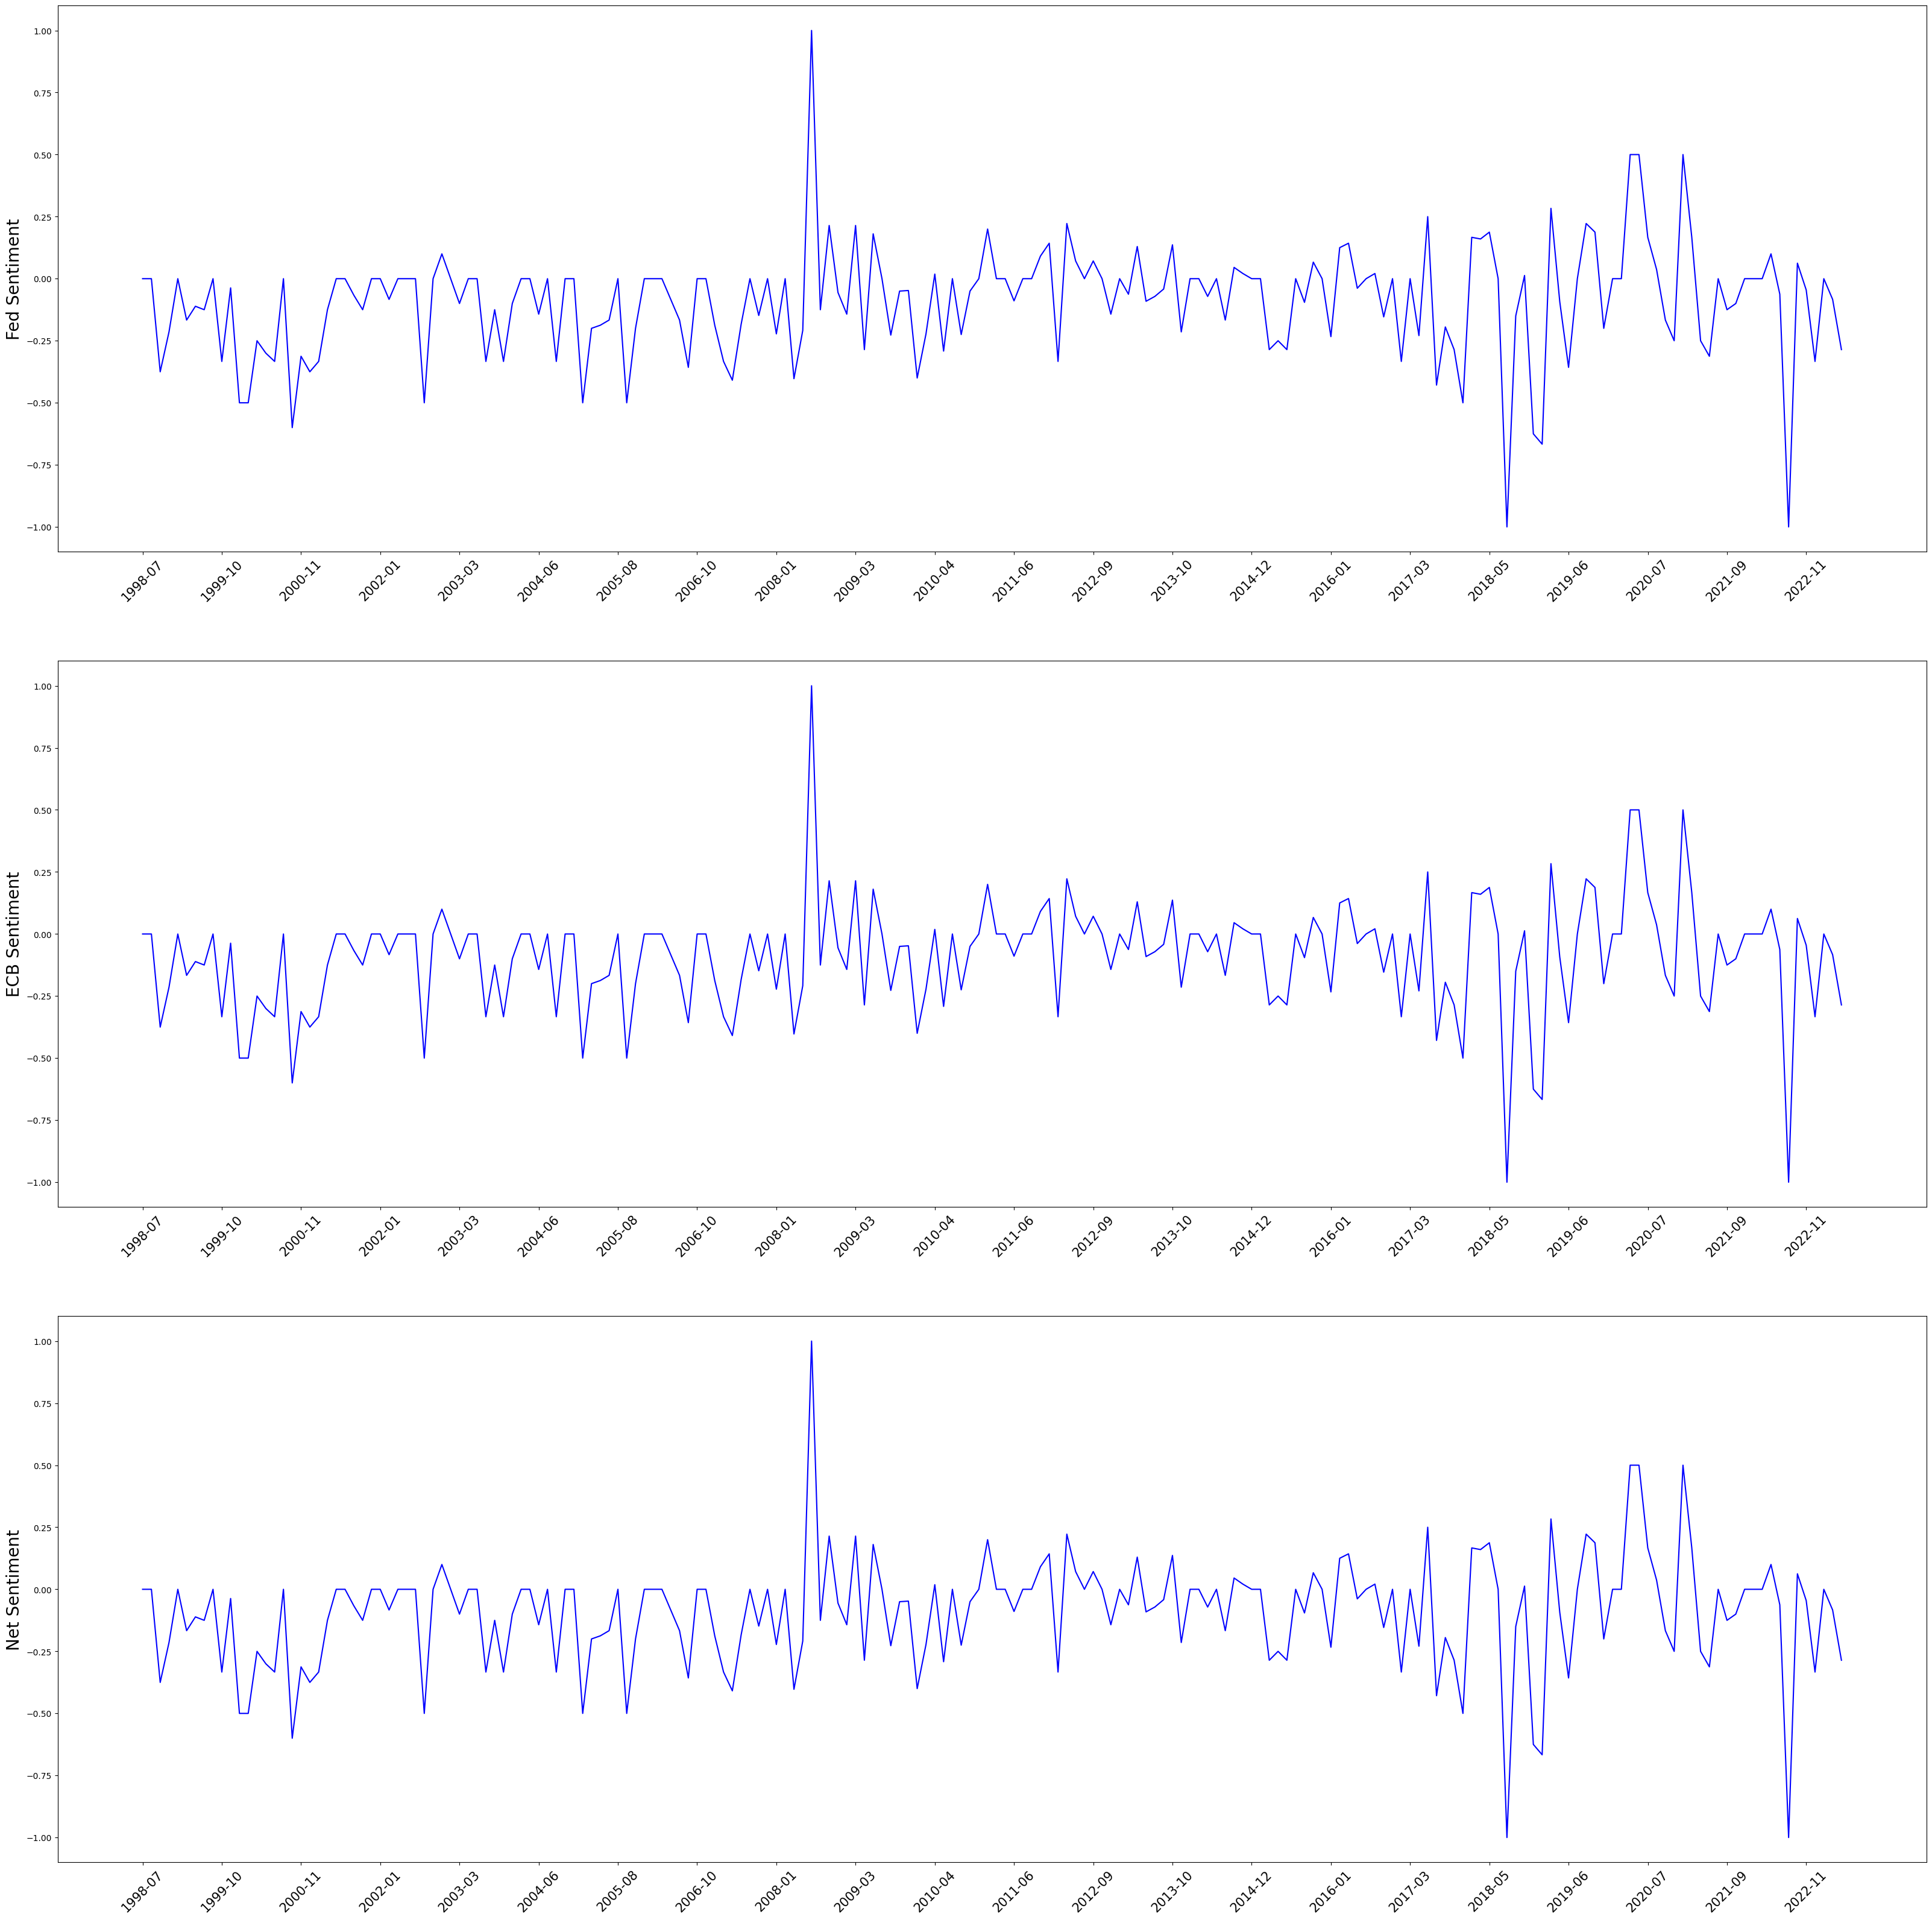

In [ ]:
# Create a list of x-axis tick positions
num_ticks = 20  # Adjust this number as needed
x_tick_positions = df_merged["date"].iloc[:: len(df_merged) // num_ticks].tolist()

fig, axs = plt.subplots(3, 1, figsize=(40, 40))

axs[0].plot(df_merged["date"], df_merged["diff"], color="blue", label="Tone")
axs[1].plot(df_merged["date"], df_merged["diff"], color="blue", label="Tone")
axs[2].plot(df_merged["date"], df_merged["diff"], color="blue", label="Tone")

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis="x", rotation=45, labelsize=15)
axs[1].tick_params(axis="x", rotation=45, labelsize=15)
axs[2].tick_params(axis="x", rotation=45, labelsize=15)

# axs[0].set_yticks(np.arange(-1, 1, .1))
# axs[1].set_yticks(np.arange(-1, 1, .1))
# axs[2].set_yticks(np.arange(-1, 1, .1))

axs[0].set_ylabel(f"{Body} Sentiment", fontsize=20)
axs[1].set_ylabel(f"{Body_2} Sentiment", fontsize=20)
axs[2].set_ylabel(f"Net Sentiment", fontsize=20)

plt.show()

KeyError: 'Fed_tone'

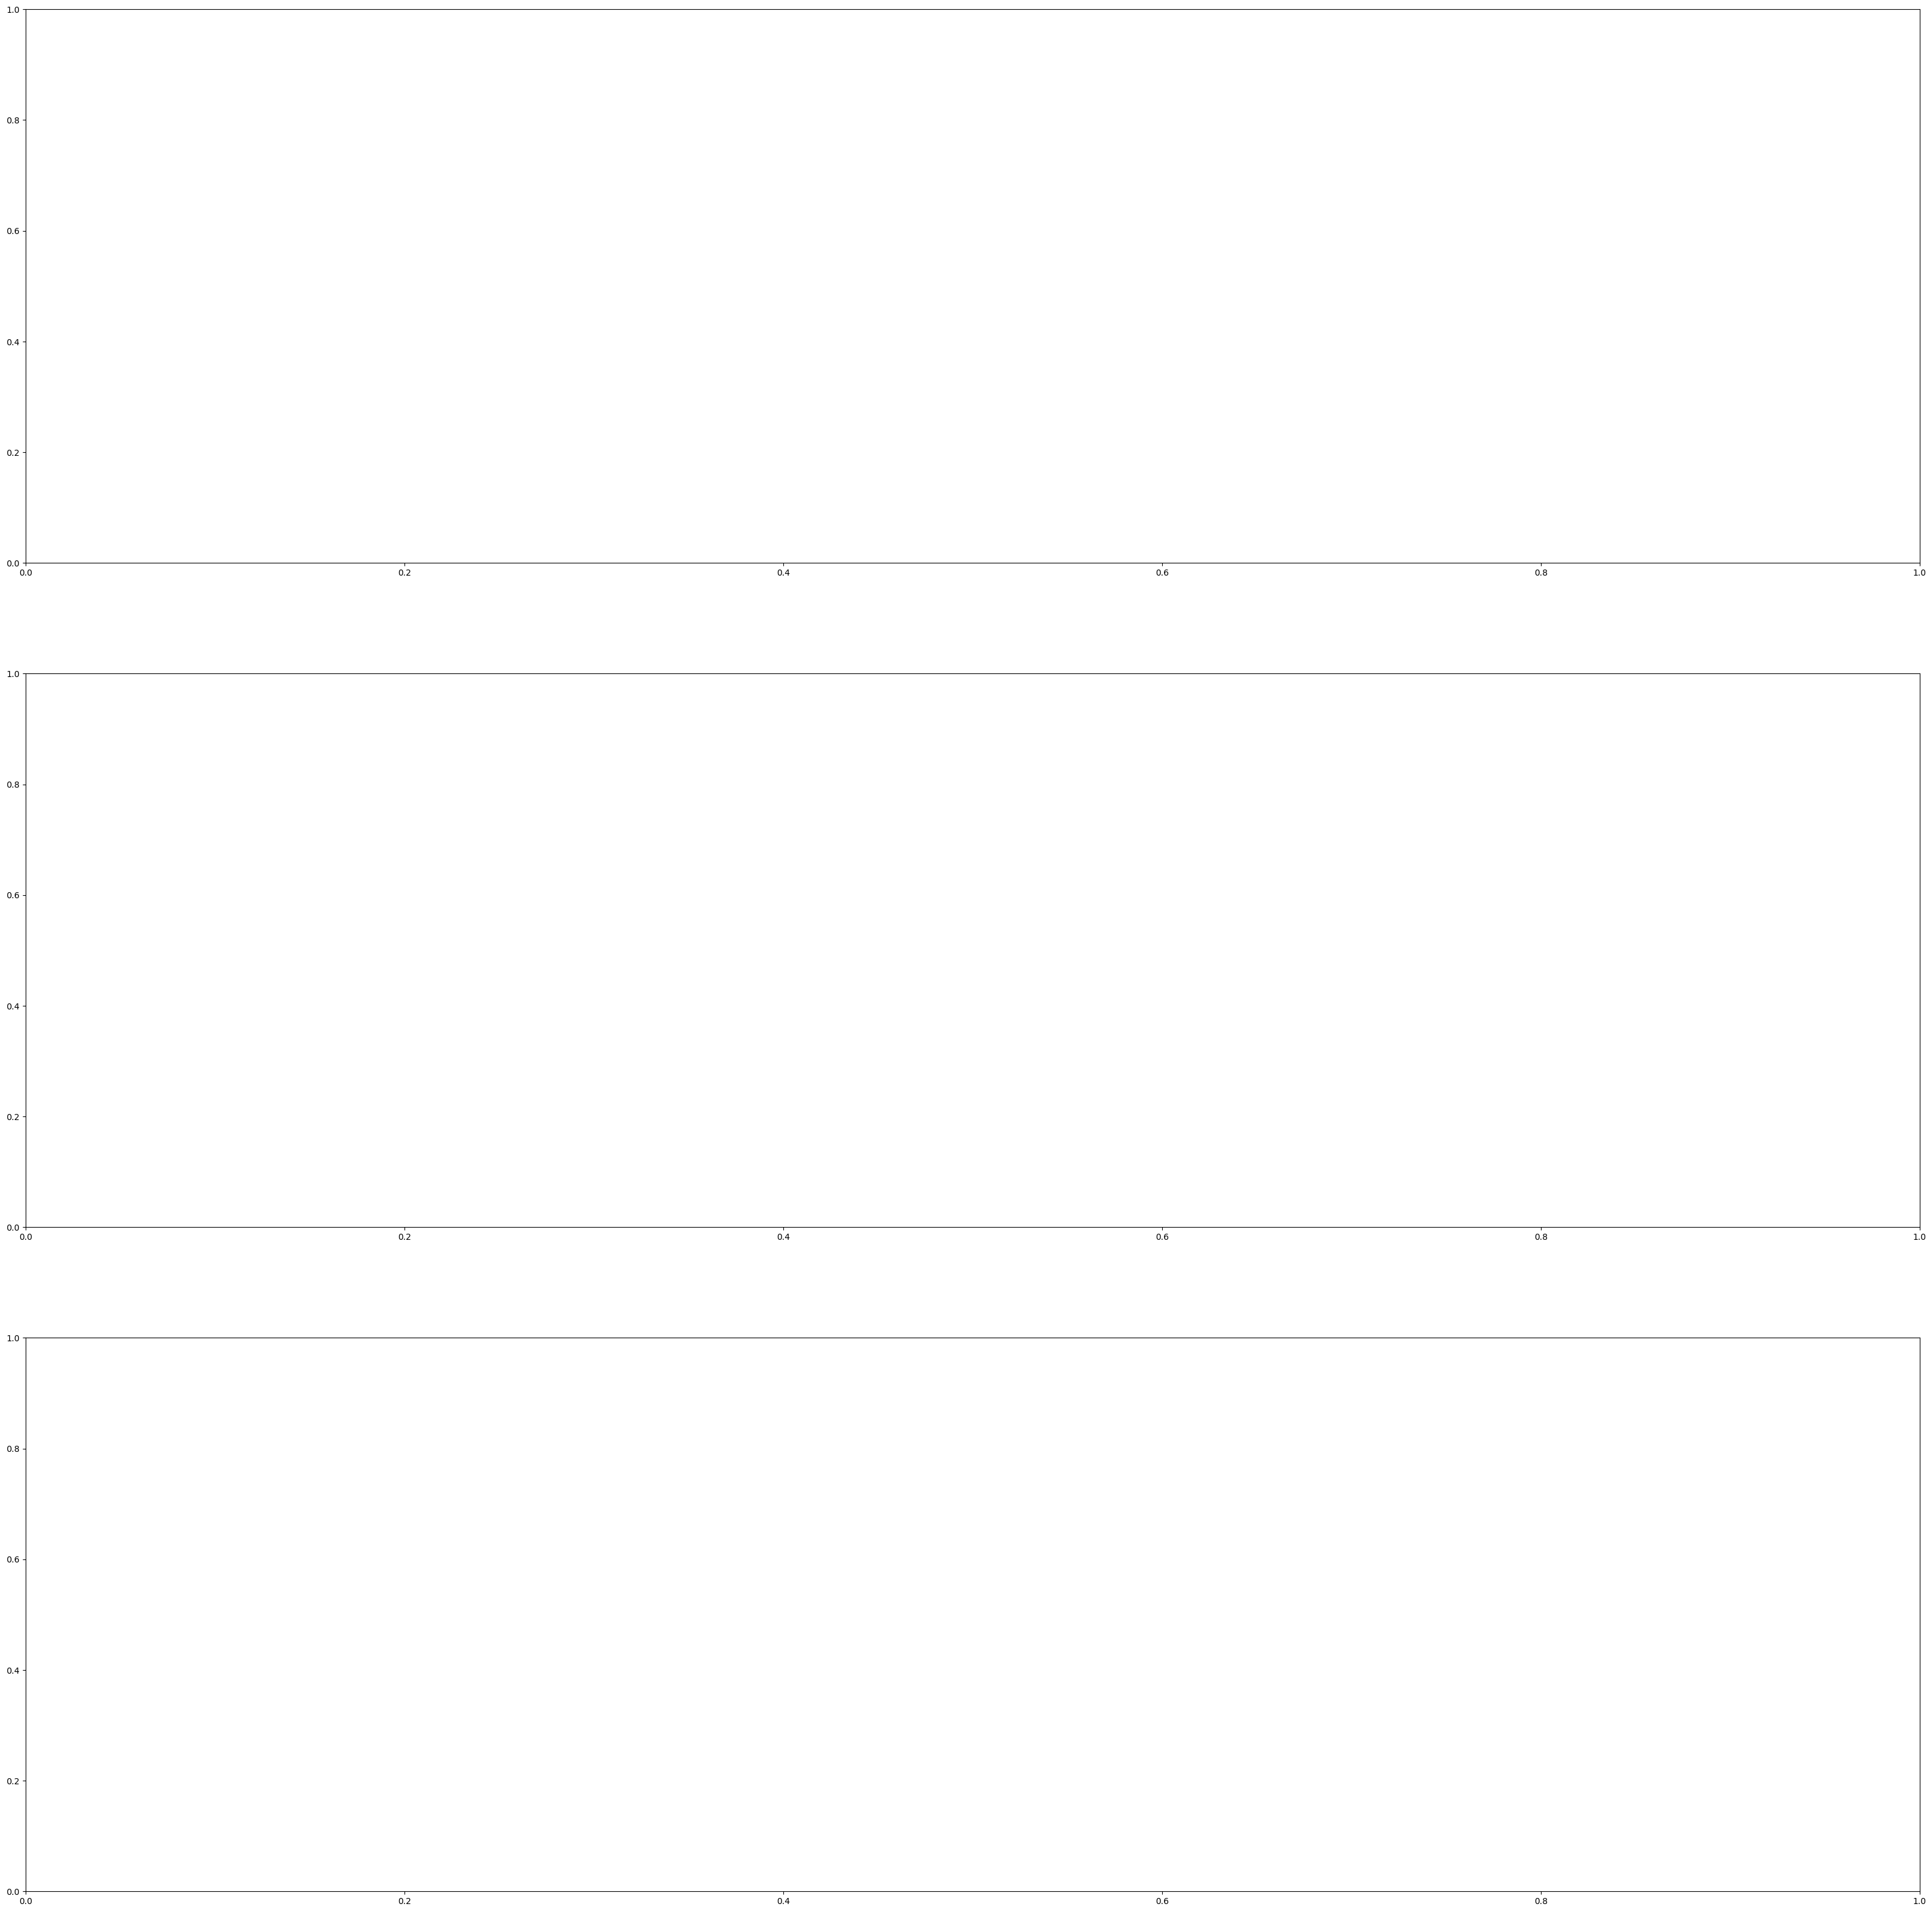

In [ ]:
# Create a list of x-axis tick positions
num_ticks = 50  # Adjust this number as needed
x_tick_positions = df_merged["date"].iloc[:: len(df_merged) // num_ticks].tolist()

y = 0

fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(
    df_merged["date"], df_merged[f"{Body}_tone"], color="blue", label="Net Tone"
)
axs[1].plot(
    df_merged["date"], df_merged[f"{Body_2}_tone"], color="red", label="Net Tone"
)
axs[0].hlines(
    y, df_merged["date"].min(), df_merged["date"].max(), color="black", label="Zero"
)
axs[1].hlines(
    y, df_merged["date"].min(), df_merged["date"].max(), color="black", label="Zero"
)

axs[2].plot(
    df_merged["date"], df_merged["net_diff_tone"], color="green", label="Net Sentiment"
)
axs[2].hlines(
    y, df_merged["date"].min(), df_merged["date"].max(), color="black", label="Zero"
)
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis="x", rotation=45, labelsize=15)
axs[1].tick_params(axis="x", rotation=45, labelsize=15)
axs[2].tick_params(axis="x", rotation=45, labelsize=15)

axs[1].set_yticks(np.arange(-1, 1, 0.1))
axs[0].set_yticks(np.arange(-1, 1, 0.1))
axs[2].set_yticks(np.arange(-1, 1, 0.1))

axs[0].set_ylabel(f"{Body} Tone Sentiment", fontsize=20)
axs[1].set_ylabel(f"{Body_2} Tone Sentiment", fontsize=20)
axs[2].set_ylabel(f"Net Tone Sentiment", fontsize=20)

plt.show()

In [ ]:
print(len(df_merged))
df_merged.to_csv(
    f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv",
    index=False,
)
print(
    f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv"
)